# Projet P6

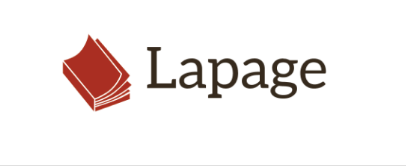

## Importation des librairies 

In [427]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import datetime as dt

import scipy.stats as st

import seaborn as sns


## Lecture des fichiers avec la fonction read_csv

In [428]:
customers= pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\customers.csv")

products= pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\products.csv")

transactions= pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\transactions.csv")

transactions_date= pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\transactions.csv", index_col='date', parse_dates=True )


## Observation des fichiers

### La clée d'unicité est id_prod

In [934]:
# id_prod concerne l'identifiant du produit et 'price' son prix

products


,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2
...,...,...,...
1530,0_1620,0.80,0
1211,0_1844,0.77,0
370,0_120,0.66,0
2272,0_528,0.62,0


In [3]:
# Observation de la coherence des prix \ Prix inf à 0

products['price'].min()

-1.0

In [429]:
# nettoyage des prix inf à 0

f=products['price']>0
products=products[f]


In [48]:
# Nombre de NaN \ Aucun NaN

products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [9]:
# Observation des potentiels doublons \ Aucun doublons

products1=products["id_prod"].value_counts()
products1.sort_values( ascending=False)


0_138     1
0_1056    1
0_2120    1
1_438     1
0_2107    1
         ..
1_538     1
1_595     1
0_1060    1
0_947     1
2_126     1
Name: id_prod, Length: 3287, dtype: int64

### La clée d'unicité est client_id

In [7]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [60]:
# Nombre de NaN

customers.isna().sum()


client_id    0
sex          0
birth        0
dtype: int64

In [94]:
# Observation des potentiels doublons \ Aucun doublons

customers1=customers["client_id"].value_counts()
customers1.sort_values( ascending=False)

c_1388    1
c_5729    1
c_2602    1
c_7255    1
c_2243    1
         ..
c_6690    1
c_3538    1
c_7911    1
c_871     1
c_7270    1
Name: client_id, Length: 8623, dtype: int64

### La clée d'unicité est session_id

In [430]:
# Supression des potentiels doublons concernants des transactions à la même date.

transactions=transactions.drop_duplicates(subset=['date'], keep='first')


In [61]:
# Nombre de NaN \ Aucun

transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [431]:
# Observation des lignes 'tests' \ suppression

nettoyage_test=transactions['id_prod']!='T_0'
transactions=transactions[nettoyage_test]
transactions.sort_values(by='id_prod', ascending=False)


,id_prod,date,session_id,client_id
119953,2_99,2022-05-21 01:53:46.967570,s_211661,c_5828
58155,2_99,2022-11-11 20:56:49.820935,s_296127,c_7135
678154,2_99,2023-01-21 01:53:46.967570,s_329932,c_5828
250210,2_99,2021-07-11 20:56:49.820935,s_61009,c_7135
174584,2_99,2021-11-21 01:53:46.967570,s_122697,c_5828
...,...,...,...,...
100545,0_0,2021-09-24 09:14:22.201885,s_94694,c_1342
521422,0_0,2022-04-03 14:59:36.547402,s_188714,c_5047
143925,0_0,2022-08-08 20:39:53.355563,s_250417,c_2300
399237,0_0,2022-09-25 12:24:49.283611,s_273283,c_2087


## Jointure des fichiers \ Base finale

In [432]:
# jointure des fichiers sur id_prod en gardant que les transactions \ jointure à gauche

df_joint1 = pd.merge(transactions, products, on='id_prod', how='left')


In [433]:
# jointure externe gauche du fichier sur client_id pour garder que les clients concernaient par les transactions

base = pd.merge(df_joint1, customers , on="client_id", how="left")
base


,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986


In [9]:
# Observation du produit id_prod=0_2245 \ Imputation de Moyenne pour le prix - aucune catégorie \ ou supression du produit

base.sort_values(by='price', ascending=False).tail(50)


,id_prod,date,session_id,client_id,price,categ,sex,birth
552375,0_2245,2022-05-02 17:51:41.043592,s_202649,c_326,NaN,NaN,f,1986
560701,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN,f,1979
561253,0_2245,2022-12-22 09:28:34.806734,s_315710,c_1811,NaN,NaN,f,1991
562013,0_2245,2021-03-28 21:39:14.337424,s_12792,c_2688,NaN,NaN,f,1968
574255,0_2245,2021-04-10 02:26:04.604882,s_18428,c_1876,NaN,NaN,m,1983
577618,0_2245,2022-11-28 18:08:49.875709,s_304172,c_4964,NaN,NaN,f,1982
577887,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972
582091,0_2245,2022-03-17 03:03:12.668129,s_180212,c_1533,NaN,NaN,m,1972
583324,0_2245,2022-05-29 23:24:51.621799,s_216074,c_2189,NaN,NaN,f,1983
585554,0_2245,2021-03-28 10:46:04.804784,s_12567,c_966,NaN,NaN,f,1981


## Nettoyage des dates

In [434]:
# Changement du dtype de 'object' en 'string'

base['date']=base['date'].astype("string")


In [435]:
# Récuperation de la chaine qui nous interesse

base['date']=base['date'].str[0:10]


In [436]:
base['mois']=base['date'].str[0:7]


In [437]:
# transformation en datetime pour plus de facilité de à la manipulation

b=base['date']

base['date']=pd.to_datetime(b, errors='coerce') 




In [438]:
base

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,2022-05
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968,2022-06
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980,2023-01
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951,2022-01
679328,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,f,1977,2022-03
679329,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,f,1988,2022-12
679330,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,m,1986,2021-07


On peut voir qu'il y a 679332 lignes qui definit le nombre de ventes.




In [24]:

# autre methode  df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors = 'coerce')

## Généralité Concernant les clients




In [202]:
# Nombre de clients _ 8600 clients avec 0_2245

base_compte=base.drop_duplicates(subset=['client_id'], keep='first')
base_compte=base_compte.sort_values(by='price', ascending=False)
kk=base_compte['price']!=0
base_compte=base_compte[kk]
a1=base_compte['client_id'].count()
print ('Le nombre de client est de :',a1)


Le nombre de client est de : 8600


In [203]:
# nombre client sans 0_2245

base_compte2=base_compte.dropna(subset = ['price'])
am=base_compte2['client_id'].count()
print ('Le nombre de client est de :',am)


Le nombre de client est de : 8597


In [204]:
# clients \ clientes

base_compte['sex'].value_counts()

f    4479
m    4121
Name: sex, dtype: int64

In [205]:
# Nombre de sessions réalisé (avec le produit 0_2245- aberrant) à la journée pour chaque client

essai=base[['session_id','client_id']].groupby(['client_id']).count()
essai=essai.reset_index()
essai['session_id'].sum()

679332

In [186]:
base

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,2022-05
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968,2022-06
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980,2023-01
...,...,...,...,...,...,...,...,...,...
679322,1_328,2023-01-22,s_330818,c_5173,29.24,1.0,f,2002,2023-01
679324,0_1572,2021-10-08,s_101701,c_725,8.61,0.0,f,1964,2021-10
679326,1_425,2022-03-18,s_181088,c_5533,16.99,1.0,f,1965,2022-03
679327,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951,2022-01


In [207]:
# Nombre de sessions réalisé sans le produit 0_2245

base3=base.dropna(subset = ['price'])
base3=base3[['session_id','client_id']].groupby(['client_id']).count()
base3=base3.reset_index()
base3['session_id'].sum()

679111

In [208]:
# panier moyen \ CA diviser par le nombre de commande

panier_moy_ca=base[['client_id','price']].groupby('client_id').sum().reset_index()
panier_moy_vente=base[['session_id','client_id']].groupby('client_id').count().reset_index()

In [209]:
base_panier_moy = pd.merge(panier_moy_ca, panier_moy_vente , on="client_id", how="left")
base_panier_moy

,client_id,price,session_id
0,c_1,558.18,39
1,c_10,1353.60,58
2,c_100,254.85,8
3,c_1000,2261.89,125
4,c_1001,1812.86,102
...,...,...,...
8595,c_995,189.41,14
8596,c_996,1625.58,95
8597,c_997,1490.01,59
8598,c_998,2779.88,53


In [277]:
# Panier moyen par client 

base_panier_moy[ 'panier_moyen']=base_panier_moy['price']/base_panier_moy['session_id']
base_panier_moy=base_panier_moy.sort_values(by='panier_moyen' ,ascending=False)
base_panier_moy.sort_values(by='client_id', ascending=True)

,client_id,price,session_id,panier_moyen
0,c_1,558.18,39,14.312308
1,c_10,1353.60,58,23.337931
2,c_100,254.85,8,31.856250
3,c_1000,2261.89,125,18.095120
4,c_1001,1812.86,102,17.773137
...,...,...,...,...
8595,c_995,189.41,14,13.529286
8596,c_996,1625.58,95,17.111368
8597,c_997,1490.01,59,25.254407
8598,c_998,2779.88,53,52.450566


In [211]:
base_panier_moy['panier_moyen'].mean()

22.020691845100924

In [280]:
base_age=base[['client_id','birth']]
base_age

,client_id,birth
0,c_103,1986
1,c_8534,1988
2,c_6714,1968
3,c_6941,2000
4,c_4232,1980
...,...,...
679327,c_8489,1951
679328,c_4370,1977
679329,c_304,1988
679330,c_2227,1986


In [286]:
# Ajout de la collonne âge 

base_age=base[['client_id','birth']]

base_panier_moy2 = pd.merge(base_panier_moy, base_age , on="client_id", how="left")

base_panier_moy2=base_panier_moy2.sort_values(by ='client_id', ascending=True).drop_duplicates(subset=['client_id'], keep='first')

base_panier_moy2



,client_id,price,session_id,panier_moyen,birth
302178,c_1,558.18,39,14.312308,1955
73205,c_10,1353.60,58,23.337931,1956
57752,c_100,254.85,8,31.856250,1992
115430,c_1000,2261.89,125,18.095120,1966
124892,c_1001,1812.86,102,17.773137,1982
...,...,...,...,...,...
386191,c_995,189.41,14,13.529286,1955
147032,c_996,1625.58,95,17.111368,1970
69233,c_997,1490.01,59,25.254407,1994
19308,c_998,2779.88,53,52.450566,2001


## Représentation graphique \ Panier moyen en fonction de l'âge 


<function matplotlib.pyplot.show(close=None, block=None)>

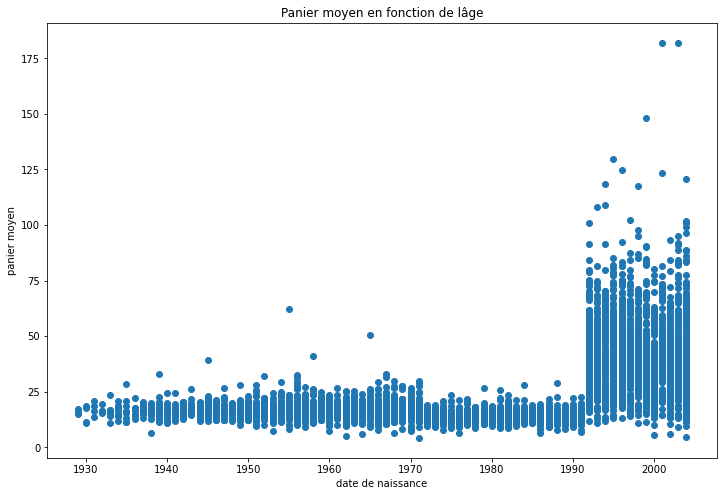

In [287]:
# Panier moyen en fonction de l'âge \ repésentation graphique 

plt.figure(figsize=(12,8))
plt.scatter(base_panier_moy2['birth'], base_panier_moy2['panier_moyen'])
plt.ylabel('panier moyen')
plt.xlabel('date de naissance')
plt.title('Panier moyen en fonction de lâge')
plt.show


In [218]:
# Moyenne des paniers moyen par date de naissance


base_panier_moy_moy=base_panier_moy2[['panier_moyen','birth']].groupby(['birth']).mean()
base_panier_moy_moy=base_panier_moy_moy.reset_index()
base_panier_moy_moy

,birth,panier_moyen
0,1929,16.029104
1,1930,17.760487
2,1931,16.561471
3,1932,16.216045
4,1933,16.068349
...,...,...
71,2000,37.374401
72,2001,41.979704
73,2002,40.152027
74,2003,40.767737


## Représentation graphique \ Moyenne du panier moyen

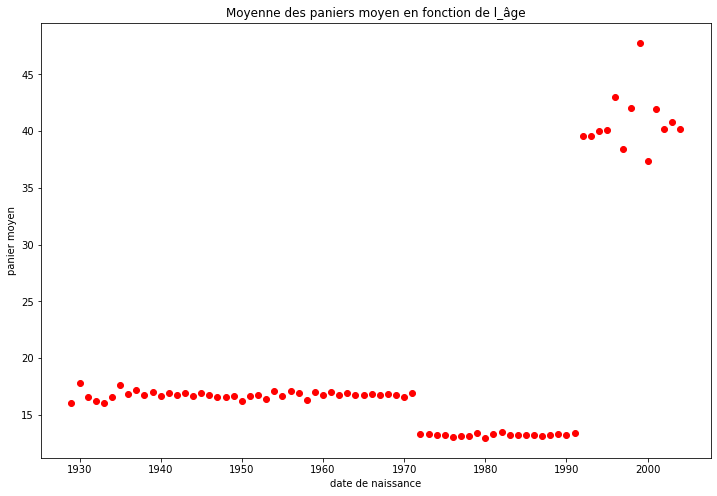

In [221]:
plt.figure(figsize=(12,8))
plt.scatter(base_panier_moy_moy['birth'], base_panier_moy_moy['panier_moyen'], c='red')
plt.ylabel('panier moyen')
plt.xlabel('date de naissance')
plt.title('Moyenne des paniers moyen en fonction de l_âge')
plt.show()


In [226]:
base_panier_moy_moy['birth'].max()

2004

In [231]:

# moyenne en euros du cluster 1992 - 2004 pour plus de visibilité 

xb=(base_panier_moy_moy['birth'] >= 1992) & (base_panier_moy_moy['birth'] <= 2004)
base_panier_moy_moyA=base_panier_moy_moy[xb]
round(base_panier_moy_moyA['panier_moyen'].mean())

41

## Récupération du minimum et du maximum des dates

In [57]:

a_min=base['date'].min()
a_max=base['date'].max()

print(a_min)
print(a_max)

2021-03-01 00:00:00
2023-02-28 00:00:00


In [63]:
# filTrage pour récupéré le CA de 2021 et 2022


# CA 1ère année

base_2021 = (base['date'] >= '2021-03-01') & (base['date'] <= '2022-02-28')
base_2021=base[base_2021]


# CA 2émes année

base_2022 = (base['date'] >= '2022-03-01') & (base['date'] <= '2023-02-28')
base_2022=base[base_2022]



## Chiffre d'affaire général \ généralités

In [22]:
# CA Total des transactions 

r=round(base['price'].sum())
m=round(base['price'].mean())

print('Le CA réalisé par toutes les transactions est de :',r,'euros')
print('La moyenne du CA réalisé pour toutes les transactions est de :',m,'euros')


Le CA réalisé par toutes les transactions est de : 11853690 euros
La moyenne du CA réalisé pour toutes les transactions est de : 17 euros


In [23]:
# filtre hommes \ Femme

filtre_h=base['sex']=='m'
base_h=base[filtre_h]

filtre_f=base['sex']=='f'
base_f=base[filtre_f]

print('CA des hommes :',round(base_h['price'].sum()),'euros')
print('CA des femmes :',round(base_f['price'].sum()),'euros')



CA des hommes : 5994027 euros
CA des femmes : 5859663 euros


In [24]:
a=base_h['price'].sum()
b=base_f['price'].sum()

p_h=round(a*100/r,2)
p_f=round(b*100/r,2)

print('Le pourcentage des femmes sur le CA général est de :',p_f, '%')
print('Le pourcentage des hommes sur le CA général est de :',p_h, '%')


Le pourcentage des femmes sur le CA général est de : 49.43 %
Le pourcentage des hommes sur le CA général est de : 50.57 %


## Représentation graphique

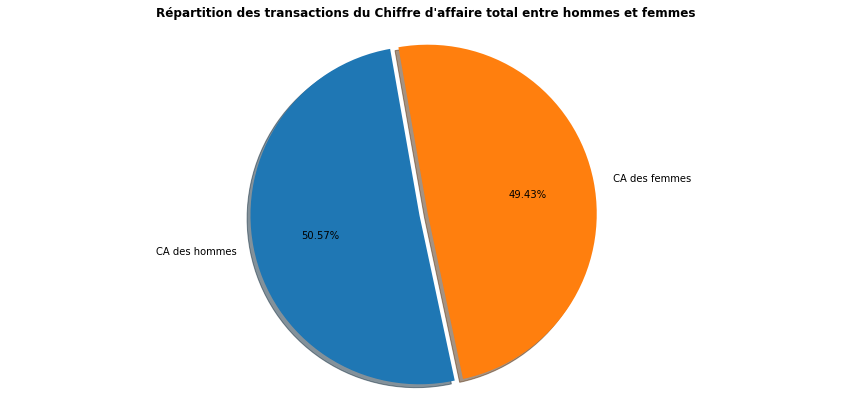

In [36]:
label = "Répartition des transactions du Chiffre d'affaire total entre hommes et femmes"
labels = 'CA des hommes' , ' CA des femmes'
x = [p_h,p_f]
explode = (0.05, 0) 

fig1, ax1 = plt.subplots()
ax1.pie( x, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  

plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
plt.savefig('Répartition_genre')


On note que sur la totalité du CA, il y a très peu de distinction de genre !

## Généralités

In [19]:
# observation des âges \ triage par ordre croissant \ avec outliers

base_age=base['birth']
base_age=base_age.sort_values( ascending=True)
base_age.unique()

array([1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004],
      dtype=int64)

Les achats sont effectué par des clients qui ont entre 17 ans et 94 ans. 

## Mesure centrale de l'âge \ base 

In [180]:
# Observation du mode \  moyenne de l'âge des clients


print(base['birth'].mode(),round(base['birth'].mean()))

0    1980
dtype: int64 1978


On peut voir grâce au 'mode' que l'occurence des dates de naissances est de 1980. Donc les personnes qui sont le plus concerné par les achats ont un âge de 41 ans. La moyenne est de l'ordre de 43 ans. 

## Mesure de dispersion

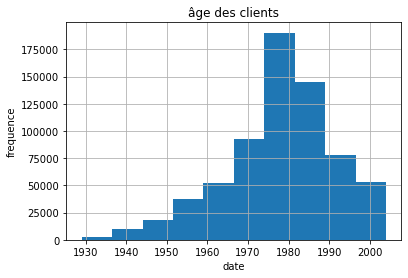

In [82]:
base['birth'].hist()
plt.ylabel('frequence')
plt.xlabel('date')
plt.title('âge des clients')
plt.savefig('mesure de dispersion') 


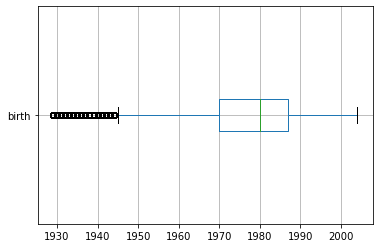

In [179]:
# autre méthode

base.boxplot(column="birth", vert=False)
plt.savefig('mesure de dispersion_boite à moustache') 


Les mesures de dispersion nous montre shématiquement les données retrouvée précédemment. On peut rajouter et voir que les clients entre 1930 et 1945 sont une minorité. 

## Chiffre d'affaire annuel sur deux années

In [784]:
CA_2021=round(base_2022['price'].sum())
CA_2022=round(base_2021['price'].sum())

print('Le CA de l_année 2021 est de :',CA_2021,'euros')
print('Le CA de l_année 2022 est de :',CA_2022,'euros')

Le CA de l_année 2021 est de : 6021992 euros
Le CA de l_année 2022 est de : 5831737 euros


## Représentation graphique 

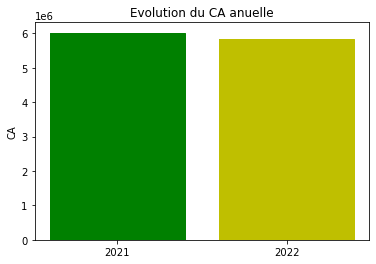

In [40]:
values = [CA_2021,CA_2022]

names = ['2021','2022']


plt.title('Evolution du CA anuelle')
plt.ylabel('CA')

plt.bar(names, values)
X=plt.bar(names, values)
X[0].set_color('g')
X[1].set_color('y')
plt.savefig('Evolution CA')


## Taux d'évolution 

In [27]:

TX=((CA_2022-CA_2021)/CA_2021*100)

print('Le CA à diminué de 2.9 % entre 2021 et 2022')


Le CA à diminué de 2.9 % entre 2021 et 2022


## Répartition des catégories 

In [64]:
# répartition des catégorie en 2021

répartition_categ_2021=base_2021['categ'].value_counts()
répartition_categ_2021

0.0    209662
1.0    109735
2.0     17788
Name: categ, dtype: int64

In [65]:
# répartition des catégorie en 2022

répartition_categ_2022=base_2022['categ'].value_counts()
répartition_categ_2022

0.0    205797
1.0    117434
2.0     18695
Name: categ, dtype: int64

## Réprésentation graphique \ Répartition des catégories

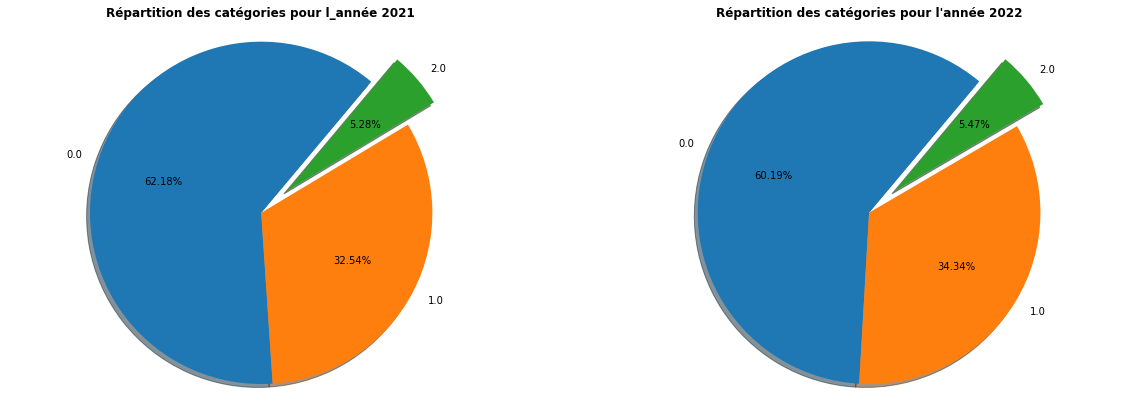

In [66]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)

label = "Répartition des catégories pour l_année 2021"
labels = 0.0,1.0,2.0
sizes = [répartition_categ_2021[el] for el in labels]
explode = (0, 0,0.2)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=50)
plt.axis('equal')
plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")

plt.subplot(1,2,2)

label = "Répartition des catégories pour l'année 2022"
labels = 0.0,1.0,2.0
sizes = [répartition_categ_2022[el] for el in labels]
explode = (0, 0,0.2) 

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=50)
plt.axis('equal') 
plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
plt.show()

La répartition nous montre que la catégorie dominante est la '0' avec un ordre de 60 % contrairement à la catégorie 2 de l'ordre de 5 à 6%. Concernant l'année 2021-2022 le même shèma de répartition est visible.

# Observation journalière et mensuelle du CA 2021

In [13]:
base

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...
679366,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951
679367,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,f,1977
679368,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,f,1988
679369,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,m,1986


In [14]:
# Creation de la colonne mois.

base['mois']=base['date'].dt.month

In [15]:
base['date']=base['date'].astype("string")


In [16]:
base['Annee-mois']=base['date'].str[0:7]
base.sort_values( by='date', ascending=True) 
base

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois,Annee-mois
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,5.0,2022-05
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988,2.0,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968,6.0,2022-06
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000,6.0,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980,1.0,2023-01
...,...,...,...,...,...,...,...,...,...,...
679366,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951,1.0,2022-01
679367,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,f,1977,3.0,2022-03
679368,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,f,1988,12.0,2022-12
679369,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,m,1986,7.0,2021-07


In [447]:
# Moyenne mobile par jour des 3 derniers mois \ Annexe

mask3=(base['date'] >= '2022-12-01') & (base['date'] <= '2023-02-28')
base_trois_dmois=base[mask3]
base_trois_dmois.sort_values( by='date') 

base_trois_dmois=base_trois_dmois.groupby(['date']).sum()

base_trois_dmois=base_trois_dmois.reset_index()

L3=base_trois_dmois['date']!='NaT'

base_trois_dmois=base_trois_dmois[L3]


base_trois_dmois['Moy_CA_Mobile']= base_trois_dmois['price'].expanding().mean()


In [450]:
# date en index

base_trois_dmois=base_trois_dmois.set_index("date")

base_trois_dmois.index = pd.to_datetime(base_trois_dmois.index)


## représentation graphique 

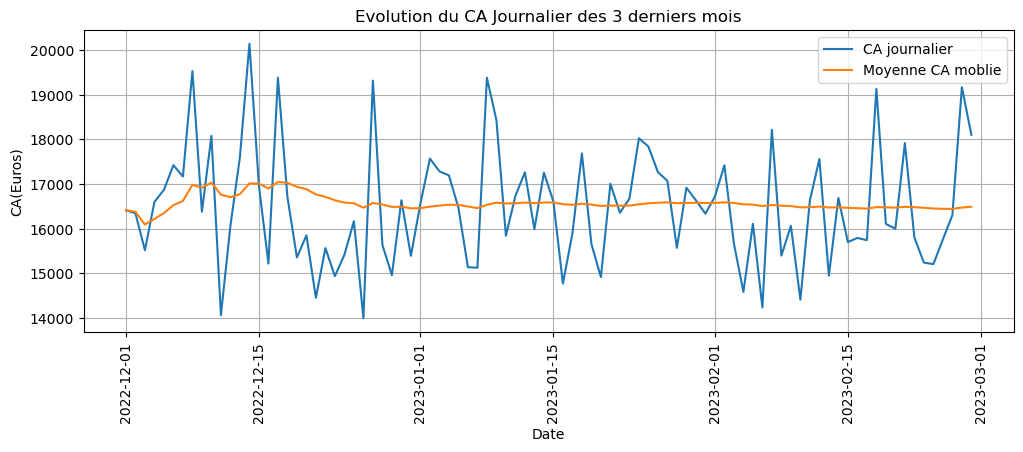

In [456]:
plt.figure(1, figsize=(12,4), dpi=100)
plt.plot(base_trois_dmois["price"], label= 'CA journalier')
plt.plot(base_trois_dmois["Moy_CA_Mobile"], label='Moyenne CA mobile')


plt.grid(True)
plt.title('Evolution du CA Journalier des 3 derniers mois')
plt.xlabel('Date')
plt.ylabel('CA(Euros)')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

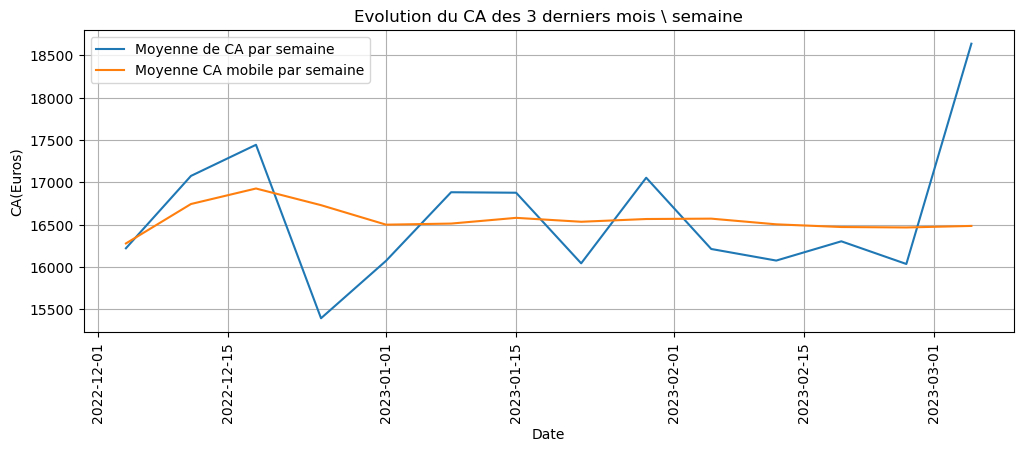

In [1531]:
# Observation de l'evolution du CA à la semaine \ Moyenne CA mobile à la semaine \ Annexe

plt.figure(1, figsize=(12,4), dpi=100)

plt.plot(base_trois_dmois["price"].resample('w').mean(), label= 'Moyenne de CA par semaine')
plt.plot(base_trois_dmois["Moy_CA_Mobile"].resample('w').mean(), label='Moyenne CA mobile par semaine')


plt.grid(True)
plt.title('Evolution du CA des 3 derniers mois \ semaine')
plt.xlabel('Date')
plt.ylabel('CA(Euros)')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

In [1171]:
# triage \ Agrégation

base.sort_values( by='Annee-mois') 

base_g1=base.groupby(['Annee-mois']).sum()

base_g1=base_g1.reset_index()

L=base_g1['Annee-mois']!='NaT'  # nettoyage

base_g1=base_g1[L]

del base_g1['categ']
del base_g1['birth']
del base_g1['mois']

base_g1


KeyError: 'Annee-mois'

In [429]:
# CA Mobile par jour

base_g1['Moy_CA_Mobile']= base_g1['price'].expanding().mean()
base_g1



,Annee-mois,price,Moy_CA_Mobile
0,2021-03,482440.61,482440.610000
1,2021-04,476109.30,479274.955000
2,2021-05,492943.47,483831.126667
3,2021-06,484088.56,483895.485000
4,2021-07,482835.40,483683.468000
5,2021-08,482284.79,483450.355000
6,2021-09,507240.68,486848.972857
7,2021-10,320798.74,466092.693750
8,2021-11,516167.73,471656.586667
9,2021-12,525917.28,477082.656000


## représentation graphique 

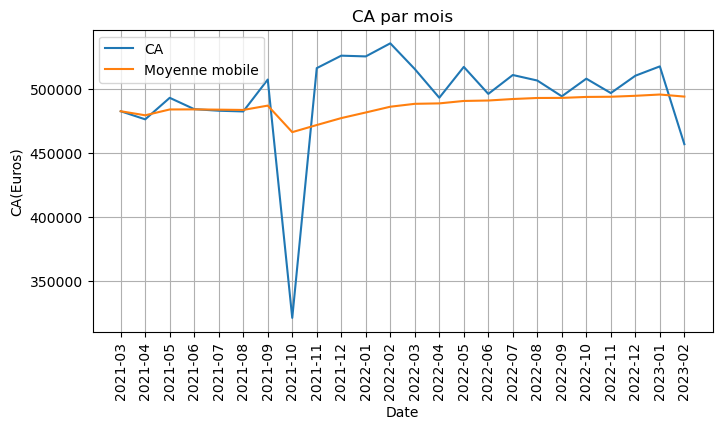

In [461]:
# Observation de courbe mensuel du CA \ courbe de la moyenne mobile du CA


plt.figure(1, figsize=(8,4), dpi=100)
plt.plot(base_g1["Annee-mois"],base_g1["price"], label="CA")
plt.plot(base_g1["Annee-mois"],base_g1["Moy_CA_Mobile"], label="Moyenne mobile")


plt.grid(True)
plt.title('CA par mois')
plt.xlabel('Date')
plt.ylabel('CA(Euros)')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()



In [122]:
# Moyenne du CA 

ca_M=round(base_g1["price"].mean())
print('La moyenne du du chiffre d_affaire est de :', ca_M)

La moyenne du du chiffre d_affaire est de : 493905


In [128]:
# CA maximum

round(base_g1["price"].max())

535571

In [23]:
# base pour les ventes \ nettoyage

base_vente=base[['Annee-mois','id_prod']].groupby(['Annee-mois']).count() 
base_vente=base_vente.reset_index()
base_vente

L=base_vente['Annee-mois']!='NaT'
base_vente=base_vente[L]
base_vente


,Annee-mois,id_prod
0,2021-03,28610
1,2021-04,28457
2,2021-05,28293
3,2021-06,26857
4,2021-07,24742
5,2021-08,25659
6,2021-09,33326
7,2021-10,21606
8,2021-11,28321
9,2021-12,32464


### Fréquence des âchats 

In [288]:
# Observation des sessions par clients

base_panier_moy2

,client_id,price,session_id,panier_moyen,birth
302178,c_1,558.18,39,14.312308,1955
73205,c_10,1353.60,58,23.337931,1956
57752,c_100,254.85,8,31.856250,1992
115430,c_1000,2261.89,125,18.095120,1966
124892,c_1001,1812.86,102,17.773137,1982
...,...,...,...,...,...
386191,c_995,189.41,14,13.529286,1955
147032,c_996,1625.58,95,17.111368,1970
69233,c_997,1490.01,59,25.254407,1994
19308,c_998,2779.88,53,52.450566,2001


In [263]:
# Regroupement des sessions par date de naissance

base_panier_session=base_panier_moy2.sort_values(by='client_id', ascending=True).drop_duplicates(subset=['client_id'], keep='first')
base_panier_session=base_panier_session.groupby(['birth']).sum()
base_panier_session=base_panier_session.reset_index()
base_panier_session

,birth,price,session_id,panier_moyen
0,1929,3221.85,201,47.952503
1,1930,4013.87,226,59.125841
2,1931,2815.45,170,69.403922
3,1932,5043.19,311,99.721798
4,1933,5254.35,327,128.212972
...,...,...,...,...
71,2000,165007.98,4415,5288.579268
72,2001,178497.70,4252,5610.523417
73,2002,184177.35,4587,5915.987466
74,2003,178195.78,4371,6438.154570


In [330]:
base_panier_session['session_id'].mean()

8425.586666666666

In [334]:

a0=(base_panier_session['birth'] >= 1930) & (base_panier_session['birth'] <= 1970)
a0=base_panier_session[a0]
a0=round(a0['session_id'].mean())

a1=(base_panier_session['birth'] >= 1970) & (base_panier_session['birth'] <= 1992)
a1=base_panier_session[a1]
a1=round(a1['session_id'].mean())


a2=(base_panier_session['birth'] >= 1992) & (base_panier_session['birth'] <= 2004)
a2=base_panier_session[a2]
a2=round(a2['session_id'].mean())


print('La moyenne de session entre 1930 et 1970 est de:',a0)
print('La moyenne de session entre 1970 et 1992 est de:',a1)
print('La moyenne de session entre 1992 et 2004 est de:',a2)


La moyenne de session entre 1930 et 1970 est de: 4169
La moyenne de session entre 1970 et 1992 est de: 18015
La moyenne de session entre 1992 et 2004 est de: 6143


In [335]:
# réalisation du boxplot en fonction des tranches d'âges \ préparation des tranches d'âge
 
a0=(base_panier_session['birth'] >= 1930) & (base_panier_session['birth'] <= 1970)
a0=base_panier_session[a0]

a1=(base_panier_session['birth'] >= 1970) & (base_panier_session['birth'] <= 1992)
a1=base_panier_session[a1]


a2=(base_panier_session['birth'] >= 1992) & (base_panier_session['birth'] <= 2004)
a2=base_panier_session[a2]




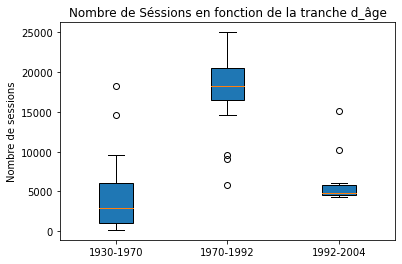

In [379]:
# réalisation du boxplot en fonction des tranches d'âge

import pylab

plt.title('Nombre de Séssions en fonction de la tranche d_âge')

plt.ylabel('Nombre de sessions')
          
Name = ['1930-1970','1970-1992','1992-2004']

data = [a0['session_id'],a1['session_id'],a2['session_id']]

plt.boxplot(data,patch_artist = True)

pylab.xticks([1,2,3], Name)

plt.show()

## Représentation graphique \ Fréquence d'âchats des clients \ Sur les deux ans 

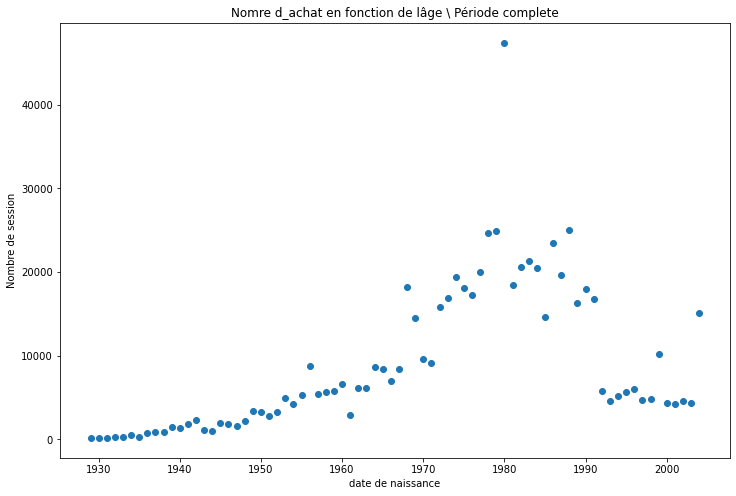

In [264]:

plt.figure(figsize=(12,8))
plt.scatter(base_panier_session['birth'], base_panier_session['session_id'])
plt.ylabel('Nombre de session')
plt.xlabel('date de naissance')
plt.title('Nomre d_achat en fonction de lâge \ Période complete')
plt.show()


In [325]:
# supression de l'outlier pour plus de visibilité

maskh=base_panier_session['session_id']<40000
base_panier_session=base_panier_session[maskh]


8425.586666666666

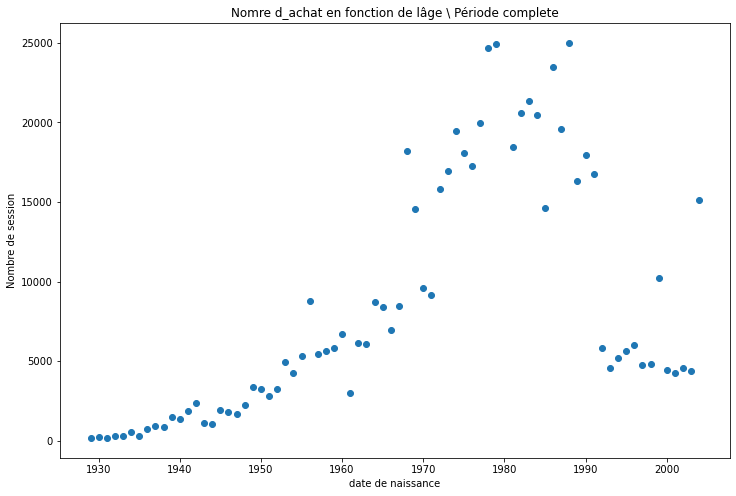

In [292]:
# Même graphique pour plus de visibilité 


plt.figure(figsize=(12,8))
plt.scatter(base_panier_session['birth'], base_panier_session['session_id'])
plt.ylabel('Nombre de session')
plt.xlabel('date de naissance')
plt.title('Nomre d_achat en fonction de lâge \ Période complete')
plt.show()


In [319]:
# Fréquence d'achat mensuelle 

base_freq_M=base[['birth','mois','session_id']].groupby(['mois','birth']).count()
base_freq_M=base_freq_M.reset_index()
base_freq_M=base_freq_M.groupby(['birth']).mean().reset_index()
base_freq_M

,birth,session_id
0,1929,8.375000
1,1930,9.416667
2,1931,7.083333
3,1932,12.958333
4,1933,13.625000
...,...,...
71,2000,183.958333
72,2001,177.166667
73,2002,191.125000
74,2003,182.125000


## Représentation graphique des ventes par mois

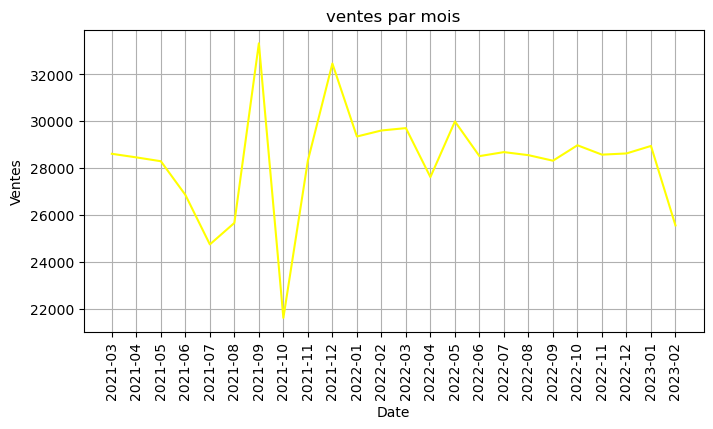

In [33]:

plt.figure(1, figsize=(8,4), dpi=100)
plt.plot(base_vente["Annee-mois"],base_vente["id_prod"], color='yellow')
plt.grid(True)
plt.title('ventes par mois')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation = 'vertical')
plt.savefig('CA par mois') 



In [125]:
# Moyenne des ventes

m_vente=round(base_vente["id_prod"].mean())
print('La Moyenne des ventes est de :', m_vente)


La Moyenne des ventes est de : 28306


In [126]:
# Nombre de vente maximum

base_vente["id_prod"].max()

33326

## Observation du mois d'octobre \ Préparation des données

In [785]:
# triage \ Agrégation \ nettoyage \ CA du mois d'octobre

base.sort_values( by='date', ascending=True) 
base_g=base.groupby(['date']).sum()
x=base_g>0
base_g=base_g[x]
base_g=base_g.reset_index()
base_g

,date,price,categ,birth,mois,nbre_ventes
0,2021-03-01,16565.22,427.0,1904339,2889.0,NaN
1,2021-03-02,15486.45,362.0,1858984,2820.0,NaN
2,2021-03-03,15198.69,360.0,1801708,2733.0,NaN
3,2021-03-04,15196.07,383.0,1785123,2709.0,NaN
4,2021-03-05,17471.37,433.0,1865533,2829.0,NaN
...,...,...,...,...,...,...
726,2023-02-25,15761.25,493.0,1790355,1810.0,NaN
727,2023-02-26,16304.72,435.0,1759258,1780.0,NaN
728,2023-02-27,19170.81,482.0,2195850,2220.0,NaN
729,2023-02-28,18105.15,539.0,1900888,1922.0,NaN


## Création des tables \ agrégation sur les catégories

In [118]:

mask=(base['date'] >= '2021-10-01') & (base['date'] <= '2021-10-31')
base_octobre_categ=base[mask]
base_octobre_categ=base_octobre_categ[['date','categ','price']]
base_octobre_categ=base_octobre_categ.sort_values( by='date', ascending=True)
m=base_octobre_categ

x=m['categ']==0
categorie_0=m[x]

categorie_0=categorie_0.groupby(['date']).sum()
categorie_0=categorie_0.reset_index()

x1=m['categ']==1
categorie_1=m[x1]


categorie_1=categorie_1.groupby(['date']).sum()
categorie_1=categorie_1.reset_index()

x2=m['categ']==2
categorie_2=m[x2]

categorie_2=categorie_2.groupby(['date']).sum()
categorie_2=categorie_2.reset_index()

base_categ = pd.merge(categorie_0, categorie_1, on='date', how='left')
base_categ2=  pd.merge(base_categ, categorie_2, on='date', how='left')

base_categ2.rename(columns={'price_x': 'categ_0'}, inplace=True)
base_categ2.rename(columns={'price_y': 'categ_1'}, inplace=True)
base_categ2.rename(columns={'price': 'categ_2'}, inplace=True)
base_categ2=base_categ2.replace(np.nan,0)


categ0=base_categ2['categ_0'].tolist()
categ1=base_categ2['categ_1'].tolist()
categ2=base_categ2['categ_2'].tolist()
date=base_categ2['date'].tolist()

base_categ2['total']=base_categ2['categ_0']+base_categ2['categ_1']+base_categ2['categ_2']



## Représentation graphique \ CA mois d'octobre

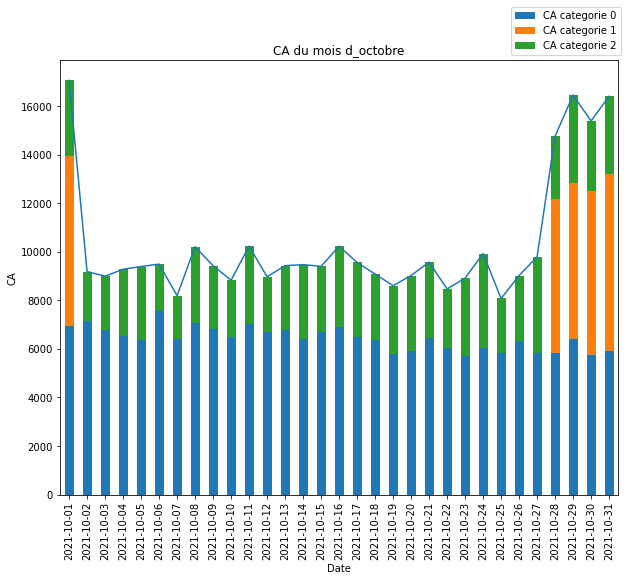

In [119]:
x = date
CA= {"CA categorie 0": categ0,
    "CA categorie 1": categ1,
    "CA categorie 2": categ2,}

df=pd.DataFrame(CA,index=x)


#plt.figure(figsize=(20,12)) --------------- autre façon

#df.plot(kind="bar",stacked=True)


df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.plot(x,base_categ2['total'])


plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

plt.xticks(rotation = 'vertical')
plt.title('CA du mois d_octobre')
plt.ylabel('CA')
plt.xlabel('Date')
plt.savefig('CA octobre') 

## Représentation graphique du dernier mois \ fevrier 2023  

In [106]:

mask2=(base['date'] >= '2023-02-01') & (base['date'] <= '2023-02-31')
base_fevrier_categ=base[mask2]
base_fevrier_categ=base_fevrier_categ[['date','categ','price']]
base_fevrier_categ=base_fevrier_categ.sort_values( by='date', ascending=True)
m1=base_fevrier_categ


p=m1['categ']==0
categorie_0_f=m1[p]

categorie_0_f=categorie_0_f.groupby(['date']).sum()
categorie_0_f=categorie_0_f.reset_index()

p2=m1['categ']==1
categorie_1_f=m1[p2]


categorie_1_f=categorie_1_f.groupby(['date']).sum()
categorie_1_f=categorie_1_f.reset_index()

p3=m1['categ']==2
categorie_2_f=m1[p3]

categorie_2_f=categorie_2_f.groupby(['date']).sum()
categorie_2_f=categorie_2_f.reset_index()

base_categ_f = pd.merge(categorie_0_f, categorie_1_f, on='date', how='left')
base_categ2_f =  pd.merge(base_categ_f, categorie_2_f, on='date', how='left')

base_categ2_f.rename(columns={'price_x': 'categ_0'}, inplace=True)
base_categ2_f.rename(columns={'price_y': 'categ_1'}, inplace=True)
base_categ2_f.rename(columns={'price': 'categ_2'}, inplace=True)
base_categ2_f=base_categ2_f.replace(np.nan,0)

del base_categ2_f['categ_x']
del base_categ2_f['categ_y']
del base_categ2_f['categ']

categ0_f=base_categ2_f['categ_0'].tolist()
categ1_f=base_categ2_f['categ_1'].tolist()
categ2_f=base_categ2_f['categ_2'].tolist()
date_f=base_categ2_f['date'].tolist()

base_categ2_f['total']=base_categ2_f['categ_0']+base_categ2_f['categ_1']+base_categ2_f['categ_2']


## Représentation graphique du dernier mois \ février 2023

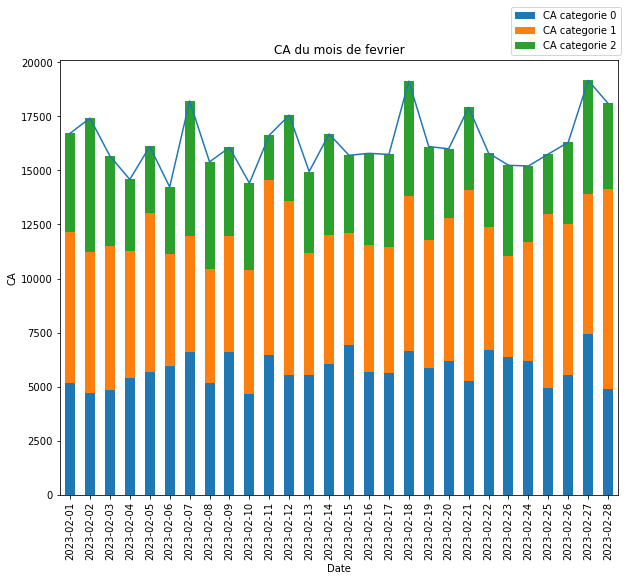

In [107]:
x = date_f
CA= {"CA categorie 0": categ0_f,
    "CA categorie 1": categ1_f,
    "CA categorie 2": categ2_f,}

df1=pd.DataFrame(CA,index=x)

df1.plot(kind="bar",stacked=True,figsize=(10,8))
plt.plot(x,base_categ2_f['total'])


plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

plt.xticks(rotation = 'vertical')
plt.title('CA du mois de fevrier')
plt.ylabel('CA')
plt.xlabel('Date')
plt.savefig('CA fevrier') 




##  Catégories 0 \ Généralité

In [59]:
# catégorie 0 \ Observation des transactions

cat0=base['categ']==0

categorie_0=base[cat0]
categorie_0=categorie_0.sort_values(by='price', ascending=True)
categorie_0['price'].unique()


array([ 0.62,  0.66,  0.77,  0.81,  0.88,  0.92,  0.93,  0.97,  0.98,
        0.99,  1.01,  1.09,  1.18,  1.21,  1.23,  1.25,  1.27,  1.28,
        1.32,  1.38,  1.41,  1.44,  1.49,  1.54,  1.57,  1.58,  1.61,
        1.62,  1.67,  1.68,  1.69,  1.73,  1.78,  1.81,  1.82,  1.83,
        1.84,  1.87,  1.89,  1.96,  1.98,  1.99,  2.  ,  2.02,  2.06,
        2.08,  2.09,  2.14,  2.15,  2.16,  2.18,  2.19,  2.21,  2.26,
        2.27,  2.28,  2.29,  2.33,  2.35,  2.36,  2.39,  2.41,  2.42,
        2.43,  2.44,  2.45,  2.46,  2.48,  2.49,  2.5 ,  2.51,  2.54,
        2.56,  2.64,  2.65,  2.74,  2.77,  2.81,  2.82,  2.84,  2.92,
        2.93,  2.94,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.02,  3.03,
        3.06,  3.07,  3.08,  3.09,  3.13,  3.15,  3.17,  3.19,  3.22,
        3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.32,  3.33,  3.4 ,
        3.41,  3.42,  3.43,  3.44,  3.47,  3.51,  3.52,  3.53,  3.55,
        3.6 ,  3.61,  3.64,  3.67,  3.68,  3.69,  3.72,  3.73,  3.74,
        3.75,  3.76,

Les prix de la catégorie 0 concerne des transactions de 0.69 à 40.99 euros

In [189]:
# CA de la catégorie 0 

CA_cat_0=categorie_0['price'].sum().round(2)
print('Le CA de la catégorie 0 est de :',CA_cat_0,'euros')
print('Le CA de la catégorie 0 Représente :',(CA_cat_0*100/r).round(2),'%')


Le CA de la catégorie 0 est de : 4419730.97 euros
Le CA de la catégorie 0 Représente : 37.29 %


In [40]:
categorie_0['price'].describe().round(2)

count    415459.00
mean         10.64
std           4.93
min           0.62
25%           6.29
50%           9.99
75%          14.45
max          40.99
Name: price, dtype: float64

La moyenne des transactions est de 10.64 euros. Grâce au quartile on peut voir que les 3/4 des prix sont en dessous de 14.45 euros

In [41]:
# Comptage des transactions en fonction des prix

categorie_0['price'].value_counts().head(5)

4.99    18423
3.99    17265
5.99    15996
8.99    15074
6.99    14281
Name: price, dtype: int64

le grand vainqueur des ventes de la catégorie 0 concerne le petit prix de 4.99 euros dans le top 5 des prix inf à 10 euros.






## Mesure de tendance centrale

In [243]:
a=categorie_0['price'].mean()
b=categorie_0['price'].mode()

print('la moyenne est de',a)
print('le mode est de 4.99')


la moyenne est de 10.638188052289737
le mode est de 4.99


## Mesure de dispersion 

In [ ]:
# histogramme et boite à moustache des transactions catégorie '0' \ dispersion

plt.title('Répartition des Transactions en fonction des prix \ categ 0')
plt.ylabel('Frequence')
plt.xlabel('Prix des transactions')
categorie_0['price'].hist(density=True)
plt.show()
categorie_0.boxplot(column="price", vert=False)


## Catégorie 0 \ genre 

In [57]:
# Femme \ CA

categorie_0_f=categorie_0['sex']=='f'
categorie_0_f=categorie_0[categorie_0_f]
categorie_0_f=categorie_0_f['price'].sum().round(2)
categorie_0_f

2189993.07

In [55]:
# Homme \ CA

categorie_0_m=categorie_0['sex']=='m'
categorie_0_m=categorie_0[categorie_0_m]
categorie_0_m=categorie_0_m['price'].sum().round(2)
categorie_0_m

2229698.9

In [62]:
print('le CA des femmes de la categorie 0 représente:',round(categorie_0_f*100/CA_cat_0,2),'%')
print('le CA des hommes de la categorie 0 représente:',round(categorie_0_m*100/CA_cat_0,2),'%')

le CA des femmes de la categorie 0 représente: 49.55 %
le CA des hommes de la categorie 0 représente: 50.45 %


La difference en terme de genre pour la catégorie 0 sur son CA total est en faveur des hommes sans grande distinction. On peut dire la répartition du genre sur le CA total de la catégorie 0 est homogéne.

In [191]:
# autre méthode \ nombre

categorie_0['sex'].value_counts()

m    209356
f    206103
Name: sex, dtype: int64

In [194]:
# fréquence

t=pd.crosstab(categorie_0.sex, "freq", normalize=True)
print(t)

col_0      freq
sex            
f      0.496085
m      0.503915


<AxesSubplot:xlabel='sex'>

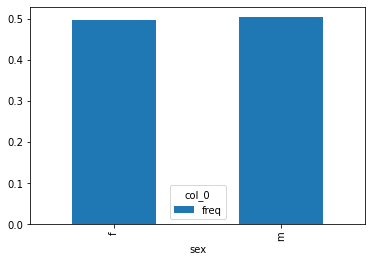

In [197]:
# représentation graphique

t.plot.bar()

## Catégorie 0 \ âges


In [245]:
# répartitions des âges de la catégories 0

categorie_0['birth'].value_counts()

1980    36882
1988    19104
1978    18855
1979    18753
1986    17970
        ...  
1935      137
1932      132
1929       78
1931       77
1930       75
Name: birth, Length: 76, dtype: int64

<AxesSubplot:>

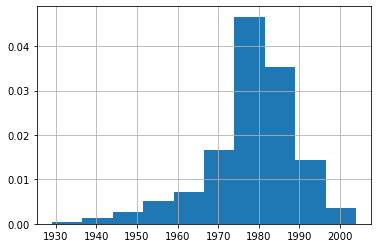

In [246]:
categorie_0['birth'].hist(density=True)

In [247]:
# Moyenne des âges

round(categorie_0['birth'].mean(),)

1978

La moyenne des âges de la catégorie 0 est de 43 ans. Le nombre des acheteurs qui ont 41 ans est le plus élevé.

## Catégorie 1 \ Généralité

In [70]:
# catégorie 1

cat1=base['categ']==1
categorie_1=base[cat1]
categorie_1=categorie_1.sort_values(by='price', ascending=False)
categorie_1['price'].unique()

array([80.99, 79.99, 78.83, 73.99, 72.75, 70.51, 68.49, 67.66, 67.65,
       66.99, 64.62, 64.59, 63.92, 62.99, 61.99, 61.52, 61.38, 61.23,
       60.99, 60.87, 60.39, 59.99, 59.11, 58.99, 58.54, 57.92, 57.45,
       56.99, 56.97, 56.07, 55.99, 55.89, 54.99, 54.9 , 54.73, 53.99,
       53.42, 52.99, 52.72, 52.03, 51.99, 51.92, 51.71, 51.6 , 51.55,
       50.99, 49.99, 49.47, 49.42, 49.16, 49.1 , 49.04, 48.99, 48.63,
       47.99, 47.83, 47.69, 47.35, 47.3 , 47.22, 46.99, 46.95, 46.87,
       46.37, 45.99, 45.78, 45.37, 45.09, 45.03, 44.99, 44.71, 44.7 ,
       44.67, 44.15, 44.09, 43.99, 43.09, 42.99, 42.25, 41.99, 41.37,
       40.99, 40.8 , 40.5 , 40.06, 39.99, 39.88, 39.86, 39.36, 39.35,
       39.33, 39.23, 39.08, 39.07, 38.99, 38.91, 38.63, 38.56, 37.99,
       37.85, 37.73, 37.44, 37.2 , 37.13, 37.12, 37.1 , 36.99, 36.82,
       36.6 , 36.42, 36.32, 36.09, 36.01, 35.99, 35.93, 35.61, 35.24,
       35.06, 35.03, 35.02, 34.99, 34.97, 34.93, 34.77, 34.52, 34.35,
       34.18, 33.99,

In [71]:
categorie_1

,id_prod,date,session_id,client_id,price,categ,sex,birth
115206,1_13,2021-12-28 08:53:20.610878,s_141224,c_6714,80.99,1.0,f,1968
669860,1_13,2023-02-25 11:50:29.283883,s_346704,c_1685,80.99,1.0,m,1977
345120,1_13,2021-12-19 16:12:49.594005,s_136815,c_2993,80.99,1.0,m,1964
391015,1_13,2021-06-26 17:59:29.336033,s_54185,c_8384,80.99,1.0,m,1939
401132,1_13,2021-12-14 06:29:14.271712,s_134110,c_546,80.99,1.0,m,2004
...,...,...,...,...,...,...,...,...
92014,1_238,2022-10-02 17:39:41.059648,s_276796,c_3454,2.00,1.0,m,1969
671153,1_238,2022-05-25 09:41:34.126787,s_213740,c_504,2.00,1.0,f,1964
269636,1_238,2022-11-07 17:55:06.032341,s_294165,c_140,2.00,1.0,m,1980
449893,1_238,2022-01-25 02:48:35.045910,s_154808,c_5422,2.00,1.0,f,1988


Les prix de la catégorie 1 concerne des prix de 2 à 80.99 euros

In [73]:
# CA de la catégorie 1 

CA_cat_1=categorie_1['price'].sum().round(2)
print('Le CA de la catégorie 1 est de :',CA_cat_1,'euros')
print('Le CA de la catégorie 1 Représente :',(CA_cat_1*100/r).round(2),'%')


Le CA de la catégorie 1 est de : 4653722.69 euros
Le CA de la catégorie 1 Représente : 39.26 %


On retiendra une répartition de 32-34% de transactions pour environ 39% du CA. La catégorie 1 est plus qualitatif que la catégorie 0 en terme de CA gagné.






In [ ]:
categorie_1['price'].describe().round(2)


La moyenne des transactions est de 20.49 euros. Grâce au quartile on peut voir que les 3/4 des prix sont en dessous de 24.98 euros. 

In [ ]:
categorie_1['price'].value_counts().head(5)


le grand vainqueur des ventes de la catégorie 1 concerne le prix de 15.99 euros. Le top 5 concerne des prix inf à 21 euros.


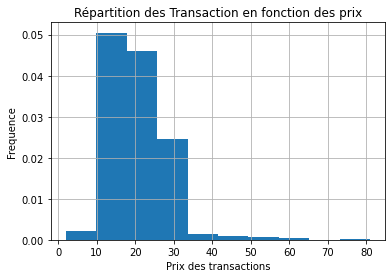

In [248]:
# histogramme des achats catégorie '1' 

plt.title('Répartition des Transaction en fonction des prix')
plt.ylabel('Frequence')
plt.xlabel('Prix des transactions')
categorie_1['price'].hist(density=True)
plt.show()


## Catégorie 1 \ genre 









In [ ]:
# Femme

categorie_1_f=categorie_1['sex']=='f'
categorie_1_f=categorie_1[categorie_1_f]
categorie_1_f=categorie_1_f['price'].sum().round(2)
categorie_1_f


In [ ]:
# Homme

categorie_1_m=categorie_1['sex']=='m'
categorie_1_m=categorie_1[categorie_1_m]
categorie_1_m=categorie_1_m['price'].sum().round(2)
categorie_1_m

In [ ]:
# autre methode cross table

In [ ]:
print('le CA des femmes de la categorie 1 représente:',round(categorie_1_f*100/CA_cat_1,2),'%')
print('le CA des hommes de la categorie 1 représente:',round(categorie_1_m*100/CA_cat_1,2),'%')

La difference en terme de genre pour la catégorie 1 sur son CA total est en faveur des femmes sans grande distinction. On peut dire que la répartition du genre sur le CA total de la catégorie 1 est aussi homogéne tous comme la catégorie 0.

In [1086]:
t1=pd.crosstab(categorie_1.sex, "freq", normalize=True)
t1.plot.bar()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'sex'

## Catégorie 1 \ âges
















In [ ]:
# répartitions des âges de la catégories 1

categorie_1['birth'].value_counts()

<AxesSubplot:>

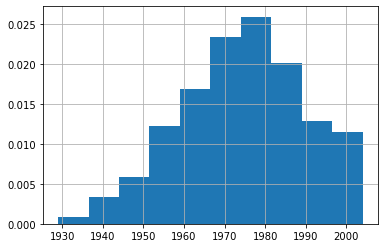

In [254]:
# Répartition des âges de la catégorie 1 \ Histogramme

categorie_1['birth'].hist(density=True)

In [255]:
round(categorie_1['birth'].mean())

1974

La moyenne d'âge de la catégorie 1 est de 48 ans. On peut voir que la moyenne est beaucoup plus élevé que la catégorie 0. La dispertion des âges étant plus étalé que la catégorie 0. Ceux qui sont concerné par le plus d'achat ont 42 ans. 

## Catégorie 2 \ Généralité 

In [74]:
# catégorie 2

cat2=base['categ']==2

categorie_2=base[cat2]
categorie_2
categorie_2=categorie_2.sort_values(by='price', ascending=False)
categorie_2['price'].unique()

array([300.  , 254.44, 247.22, 236.99, 233.54, 231.99, 230.04, 228.11,
       225.17, 222.97, 203.99, 202.99, 201.99, 201.74, 195.99, 191.99,
       189.99, 188.48, 182.3 , 181.99, 176.2 , 175.99, 175.67, 172.99,
       170.99, 167.49, 166.21, 164.99, 163.94, 162.03, 160.99, 158.99,
       158.17, 157.99, 157.63, 157.42, 156.99, 155.99, 150.72, 150.69,
       149.74, 147.99, 145.99, 145.45, 142.99, 142.58, 139.99, 138.53,
       138.32, 136.99, 136.07, 134.57, 132.52, 131.99, 130.99, 130.8 ,
       129.74, 129.11, 128.99, 127.99, 127.39, 125.99, 124.99, 123.99,
       120.68, 120.61, 120.22, 119.07, 118.51, 116.99, 116.98, 116.67,
       115.99, 115.93, 115.75, 115.3 , 114.99, 113.99, 111.99, 111.72,
       110.98, 110.08, 109.99, 109.38, 108.99, 107.99, 106.52, 105.99,
       105.24, 104.99, 104.78, 104.76, 104.06, 103.99, 103.92, 103.58,
       103.5 , 102.99, 102.82, 101.99, 101.51, 100.99, 100.56,  99.99,
        98.99,  96.99,  96.88,  96.74,  96.69,  96.56,  93.99,  93.92,
      

In [75]:
categorie_2

,id_prod,date,session_id,client_id,price,categ,sex,birth
143210,2_2,2021-06-06 23:14:33.815188,s_45088,c_2467,300.00,2.0,f,1997
319858,2_2,2022-03-28 21:24:28.442508,s_185980,c_659,300.00,2.0,f,2001
76808,2_2,2021-06-12 08:44:00.882917,s_47558,c_5237,300.00,2.0,m,1999
181566,2_2,2021-12-07 06:52:26.810576,s_130658,c_4958,300.00,2.0,m,1999
594962,2_2,2022-11-28 21:24:28.442508,s_304241,c_659,300.00,2.0,f,2001
...,...,...,...,...,...,...,...,...
247520,2_33,2021-12-08 02:04:02.778587,s_131046,c_4958,30.99,2.0,m,1999
381163,2_33,2021-11-22 02:46:42.226665,s_123157,c_6698,30.99,2.0,f,1996
19000,2_33,2021-12-17 04:45:39.774942,s_135578,c_6445,30.99,2.0,m,1993
18366,2_33,2021-10-01 01:05:35.151879,s_98195,c_737,30.99,2.0,f,1994


Les prix de la catégorie 2 concerne des prix de 30.99 à 300 euros, beaucoup plus élevé que la catégorie 0 et 1

In [260]:
# CA de la catégorie 2

CA_cat_2=categorie_2['price'].sum().round(2)
print('Le CA de la catégorie 0 est de :',CA_cat_2,'euros')
print('Le CA de la catégorie 0 Représente :',(CA_cat_2*100/r).round(2),'%')


Le CA de la catégorie 0 est de : 2780275.02 euros
Le CA de la catégorie 0 Représente : 23.45 %


Une répartition de 5-6% des transactions pour 23.45% du CA Total. La catégorie 2 nous montre que pour le peu de vente qu'il y a contrairement à ses homologues, elle à son importance capital dans le CA total !


In [261]:
categorie_2['price'].describe().round(2)


count    36483.00
mean        76.21
std         39.75
min         30.99
25%         53.99
50%         62.83
75%         73.72
max        300.00
Name: price, dtype: float64

La moyenne des transactions est de 76 euros. Grâce au quartile on peut voir que les 3/4 des prix sont en dessous de 73.72 euros

In [262]:
categorie_2['price'].value_counts()

68.99     2232
69.99     2175
50.99     1704
67.57     1652
57.99     1418
          ... 
103.50       3
142.58       3
150.72       3
149.74       1
115.99       1
Name: price, Length: 197, dtype: int64

le grand vainqueur des ventes de la catégorie 2 concerne le prix de 68.99 euros. Le top 5 concerne des prix inf à 70 euros.


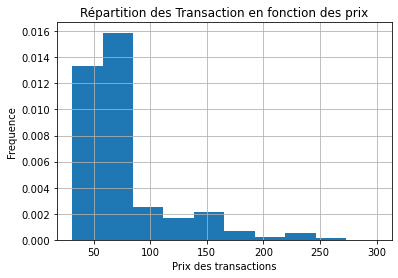

In [263]:
# histogramme des transactions catégorie '2' 

plt.title('Répartition des Transaction en fonction des prix')
plt.ylabel('Frequence')
plt.xlabel('Prix des transactions')
categorie_2['price'].hist(density=True)
plt.show()


## Catégorie 2 \ genre 


In [283]:
# Femme

categorie_2_f=categorie_2['sex']=='f'
categorie_2_f=categorie_2[categorie_2_f]
categorie_2_f=categorie_2_f['price'].sum().round(2)
categorie_2_f

1311253.04

In [284]:
# Homme

categorie_2_m=categorie_2['sex']=='m'
categorie_2_m=categorie_2[categorie_2_m]
categorie_2_m=categorie_2_m['price'].sum().round(2)
categorie_2_m

1469021.98

In [285]:
print('le CA des femmes de la categorie 2 représente:',round(categorie_2_f*100/CA_cat_2,2),'%')
print('le CA des hommes de la categorie 2 représente:',round(categorie_2_m*100/CA_cat_2,2),'%')

le CA des femmes de la categorie 2 représente: 47.16 %
le CA des hommes de la categorie 2 représente: 52.84 %


On peut voit voir que pour la caégorie 2, Les hommes sont plus concerné par les achats que les femmes. 

## Représentation graphique

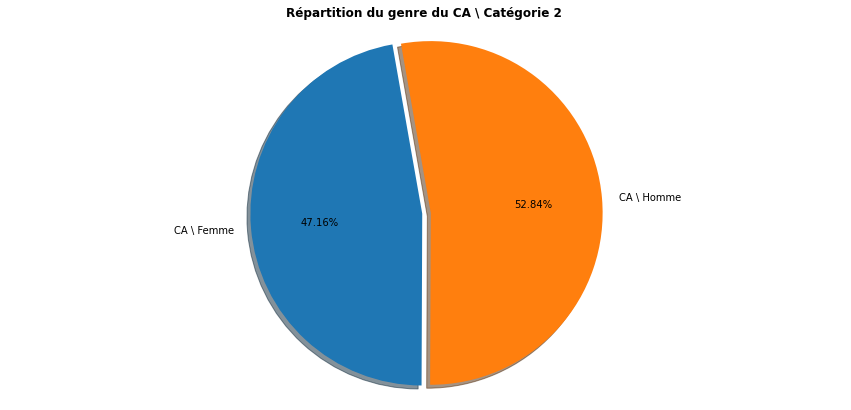

In [286]:
label = "Répartition du genre du CA \ Catégorie 2 "
labels = 'CA \ Femme' , 'CA \ Homme'
x = [round(categorie_2_f*100/CA_cat_2,2),round(categorie_2_m*100/CA_cat_2,2)]
explode = (0.05, 0) 

fig1, ax1 = plt.subplots()
ax1.pie( x, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  

plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
plt.show()




## Catégorie 2 \ âges

In [288]:
# répartitions des âges de la catégories 2

categorie_2['birth'].value_counts()

2004    6012
1999    5260
1996    2622
1992    2348
1995    2239
        ... 
1930       2
1932       2
1935       2
1933       1
1929       1
Name: birth, Length: 76, dtype: int64

<AxesSubplot:>

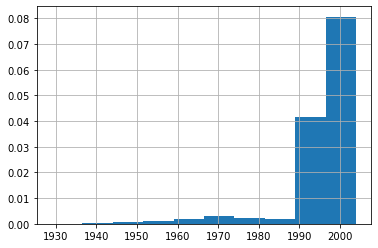

In [287]:
# Répartition des âges de la catégorie 2 \ Histogramme

categorie_2['birth'].hist(density=True)

In [289]:
# Moyenne d'âge

round(categorie_2['birth'].mean())

1996

La moyenne d'âchat de la catégorie 2 est de 26 ans. Elle est clairement plus jeune que les deux autres catégories. l'âge concerné par le plus d'achat dans la catégorie 2 est de 18 ans. La dispersion s'étend principalement de 1990 à 2000.

## Conclusion  









Concernant la distinction du genre sur l'ensemble de la base et des catégories; il y a très peu de distinction. La dispersion ainsi que les mesures centrales des 3 catégories sont differentes. On peut voir que les jeunes sont plus concerné par la catégorie 2 qui implique de plus grande depense et qui représente un ordre de 23% de CA.













## Répartitions du CA et des produits




In [502]:
# récupération du nombre de ventes \ récupération du CA par produit


h=base['id_prod'].value_counts() 
h=h.reset_index()
h1=base[['id_prod','price']].groupby(['id_prod']).sum() 
h1=h1.reset_index()

# Renommage 

h.rename(columns={'index': 'id__prod'}, inplace=True) 
h.rename(columns={'id_prod': 'nbre_ventes'}, inplace=True) 

h1.rename(columns={'price': 'CA'}, inplace=True) 
h1.rename(columns={'id_prod': 'id__prod'}, inplace=True) 

In [728]:
# jointure 

base_vente = pd.merge(h, h1 , on="id__prod", how="left")
base_vente

,id__prod,nbre_ventes,CA
0,1_369,2252,54025.48
1,1_417,2189,45947.11
2,1_414,2180,51949.40
3,1_498,2128,49731.36
4,1_425,2096,35611.04
...,...,...,...
3262,0_1683,1,2.99
3263,0_1379,1,2.99
3264,0_886,1,21.82
3265,0_541,1,1.99


In [511]:
k1=round(base_vente['nbre_ventes'].mean())
k2=round(base_vente['CA'].mean())

print('Nomre moyen de vente',k1)
print('Nomre du CA par produit',k2)

Nomre moyen de vente 208
Nomre du CA par produit 3628


In [729]:
# Nombre du CA par produit \ decroissant

base_vente_CA=base_vente.sort_values(by='CA', ascending=False)
base_vente_CA

,id__prod,nbre_ventes,CA
340,2_159,650,94893.50
146,2_135,1005,69334.95
165,2_112,968,65407.76
132,2_102,1027,60736.78
236,2_209,814,56971.86
...,...,...,...
3247,0_1653,2,1.98
3251,0_1284,1,1.38
3253,0_1539,1,0.99
1856,T_0,39,0.00


In [731]:
# Création de colonne pourcentage du CA \ création de la colonne pour les produits

base_vente_CA["cumpercentage"] = base_vente_CA["CA"].cumsum()/base_vente_CA["CA"].sum()*100
base_vente_CA['numero_produit']=np.arange(1, len(base_vente_CA)+1)
base_vente_CA



,id__prod,nbre_ventes,CA,cumpercentage,numero_produit
340,2_159,650,94893.50,0.800537,1
146,2_135,1005,69334.95,1.385458,2
165,2_112,968,65407.76,1.937249,3
132,2_102,1027,60736.78,2.449634,4
236,2_209,814,56971.86,2.930258,5
...,...,...,...,...,...
3247,0_1653,2,1.98,99.999980,3263
3251,0_1284,1,1.38,99.999992,3264
3253,0_1539,1,0.99,100.000000,3265
1856,T_0,39,0.00,100.000000,3266


## Représentation graphique 

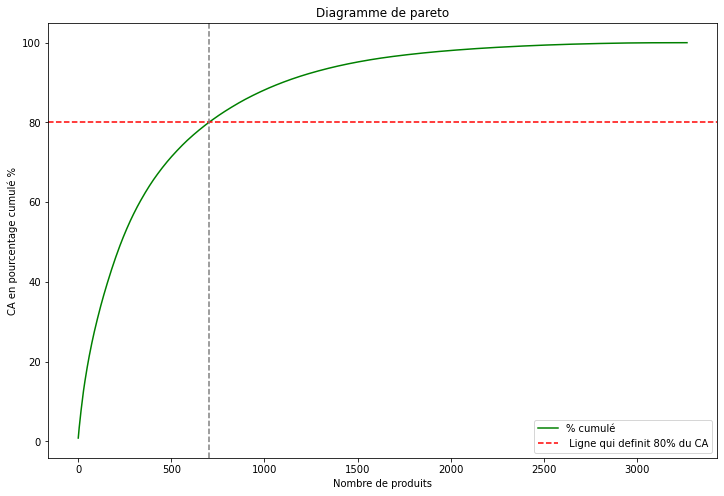

In [732]:
# Diagramme de Pareto \ CA en fonction des produits 

plt.figure(figsize=(12,8))
plt.plot(base_vente_CA['numero_produit'], base_vente_CA["cumpercentage"], color='g', label='% cumulé' )
plt.title('Diagramme de pareto')
plt.xlabel('Nombre de produits')
plt.ylabel('CA en pourcentage cumulé %')
plt.axhline(y=80,color='red',linestyle='--', label=' Ligne qui definit 80% du CA')
plt.axvline(x=700,color='gray',linestyle='--')
plt.legend()
plt.show()



In [781]:
# Nombre de produit à 80% de CA

base_seuil=base_vente_CA[['numero_produit','cumpercentage']]
j=base_seuil['cumpercentage']<80
base_seuil[j]

,numero_produit,cumpercentage
340,1,0.800537
146,2,1.385458
165,3,1.937249
132,4,2.449634
236,5,2.930258
...,...,...
314,697,79.828111
751,698,79.862813
613,699,79.897489
600,700,79.932163


il y 702 produit à 80% de CA

In [805]:
# 3286 produit de base \ observation dans le fichier product

nombre_produit_restant=base['id_prod']
nombre_produit_restant=nombre_produit_restant.drop_duplicates(keep='first')
nombre_produit_restant

0         0_1518
1          1_251
2         0_1277
3          2_209
4         0_1509
           ...  
593508    0_1279
601826    0_1683
618531    0_1379
644756     0_886
661288     0_833
Name: id_prod, Length: 3267, dtype: object

In [807]:
n=3286-3267
print('Le nombre de produit qui n_a pas éte vendu est de :',n)

Le nombre de produit qui n_a pas éte vendu est de : 19


In [821]:
f1=base[['id_prod','price']].groupby(['id_prod']).count().sort_values(by='price', ascending=True)
ww=f1['price']==1
res=f1[ww].count()
print(res)

price    18
dtype: int64


Le nombre de produits vendu une seul fois est de : 18

In [842]:
obs1=base_vente_CA[['id__prod','CA']]
obs2=base_vente_CA[['id__prod','nbre_ventes']]


In [844]:
# top 10 des produits les plus remunérateur

obs1.head(10)

,id__prod,CA
340,2_159,94893.50
146,2_135,69334.95
165,2_112,65407.76
132,2_102,60736.78
236,2_209,56971.86
12,1_395,54356.25
0,1_369,54025.48
205,2_110,53846.25
186,2_39,53060.85
837,2_166,52449.12


In [846]:
# top 10 des produits les plus vendus

obs2.sort_values(by='nbre_ventes', ascending=False)

,id__prod,nbre_ventes
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
...,...,...
3261,0_833,1
3262,0_1683,1
3263,0_1379,1
3252,2_23,1


In [831]:
ca_client=base[['client_id','price']].groupby(['client_id']).sum()
ca_client=ca_client.reset_index()
ca_client.sort_values(by='price', ascending=False)

,client_id,price
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153598.92
2724,c_3454,113637.93
2513,c_3263,5276.87
...,...,...
7889,c_8114,9.98
7918,c_8140,8.30
8151,c_8351,6.31
8600,ct_0,0.00


<AxesSubplot:title={'center':'Répartition du CA par client'}, ylabel='client'>

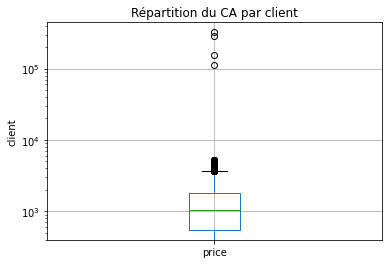

In [837]:
plt.figure()
plt.title('Répartition du CA par client')
plt.ylabel('CA')
plt.ylabel('client')
plt.yscale('log')
ca_client.boxplot(column="price")



## Courbe de lorenz \ achats en général



In [ ]:
base_client_f=base[['client_id','price','sex']]                             # selection des colonnes

base_client_f=base_client_f.groupby(['client_id']).sum()              # agrégation sur l'id du client
base_client_f

In [ ]:
# nettoyage

f=base_client_f['price']>0
base_client_f=base_client_f[f]
base_client_f

In [791]:
# triage par ordre croissant

base_client_f_trier=base_client_f['price'].sort_values()
base_client_f_trier=base_client_f_trier.reset_index()
base_client_f_trier

,client_id,price
0,c_8351,6.31
1,c_8140,8.30
2,c_8114,9.98
3,c_240,11.06
4,c_4648,11.20
...,...,...
8595,c_3263,5276.87
8596,c_3454,113637.93
8597,c_6714,153598.92
8598,c_4958,289760.34


In [839]:
# rajout de la colonne ct \ courbe de lorenz 

base_client_f_trier['Ct']=np.arange(1,len(base_client_f_trier)+1)
base_client_f_trier=base_client_f_trier.sort_values(by='price', ascending=False)
base_client_f_trier

,client_id,price,Ct
8599,c_1609,324033.35,1
8598,c_4958,289760.34,2
8597,c_6714,153598.92,3
8596,c_3454,113637.93,4
8595,c_3263,5276.87,5
...,...,...,...
4,c_4648,11.20,8596
3,c_240,11.06,8597
2,c_8114,9.98,8598
1,c_8140,8.30,8599


In [756]:
# Somme et somme cumulée

a = base_client_f_trier['price'].sum()
y = base_client_f_trier['price'].cumsum()

In [763]:
base_client_f_trier['cacumsum']=y/a*100

In [764]:
base_client_f_trier

,client_id,price,Ct,cacumsum
8599,c_1609,324033.35,1,2.733599
8598,c_4958,289760.34,2,5.178064
8597,c_6714,153598.92,3,6.473850
8596,c_3454,113637.93,4,7.432518
8595,c_3263,5276.87,5,7.477035
...,...,...,...,...
4,c_4648,11.20,8596,99.999699
3,c_240,11.06,8597,99.999793
2,c_8114,9.98,8598,99.999877
1,c_8140,8.30,8599,99.999947


In [308]:
# autre nomination pour la création de la courbe de lorenz

dep = base_client_f_trier['price'].values


array([6.3100000e+00, 8.3000000e+00, 9.9800000e+00, ..., 1.5359892e+05,
       2.8976034e+05, 3.2403335e+05])

In [ ]:
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
n = len(dep)

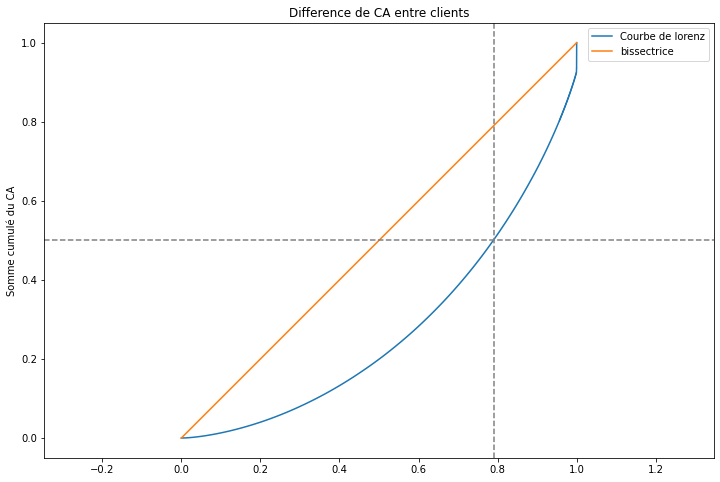

In [759]:
plt.figure(figsize=(12,8))
plt.axes().axis('equal')
xaxis = np.linspace(0,1,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='Courbe de lorenz')
plt.plot(xaxis,xaxis, label='bissectrice')
plt.axhline(y=0.5,color='gray',linestyle='--')
plt.axvline(x=0.79,color='gray',linestyle='--')
plt.title('Difference de CA entre clients')
plt.ylabel('Somme cumulé du CA') 

plt.legend()
plt.show()

In [624]:
# indice de gini

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC 
gini = 2*S
round(gini,2)

0.45


Plus l'indice de gini se rapproche de 1 plus l'inégalité est élevé. On est donc en présence d'inégalité des achats parmis les clients

In [765]:
# On determine à 50% CA cummulé combien on à de pourcentage de client \ Il y a 8600 clients

B=base_client_f_trier['cacumsum']<50
base_client_f_trier[B]

,client_id,price,Ct,cacumsum
8599,c_1609,324033.35,1,2.733599
8598,c_4958,289760.34,2,5.178064
8597,c_6714,153598.92,3,6.473850
8596,c_3454,113637.93,4,7.432518
8595,c_3263,5276.87,5,7.477035
...,...,...,...,...
6791,c_3113,1959.14,1809,49.920844
6790,c_1100,1958.98,1810,49.937371
6789,c_7750,1958.33,1811,49.953891
6788,c_6275,1956.96,1812,49.970401


In [769]:
# Nombre de gros clients

nombre_gros_clients=round(1813/8600*100)

print('Il y a 50% du CA capter par les plus gros client qui est de:',nombre_gros_clients,'%')

Il y a 50% du CA capter par les plus gros client qui est de: 21 %


In [770]:
# Moyenne CA pour un client

m_ca_client=round(base_client_f_trier['price'].mean())

print('La moyenne du CA par client est de:',m_ca_client)

La moyenne du CA par client est de: 1378


In [775]:
# Moyenne pour un client en terme d'achats 

p=base[['session_id','client_id']].groupby(['client_id']).count()
p=p.reset_index()
w5=round(p['session_id'].mean())

print('La moyenne par client en terme d_achat est de:',w5,'achats')


La moyenne par client en terme d_achat est de: 79 achats


In [1173]:
base

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,2022-05
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968,2022-06
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980,2023-01
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951,2022-01
679328,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,f,1977,2022-03
679329,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,f,1988,2022-12
679330,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,m,1986,2021-07


## Validation et appuie des tests statisiques 

In [1042]:
base

,id_prod,date,session_id,client_id,price,categ,sex,birth,sex_numerique
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,1
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988,0
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968,1
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000,0
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980,0
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951,1
679328,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,f,1977,1
679329,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,f,1988,1
679330,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,m,1986,0


In [1035]:
# création de la colonne sex_munerique (colonne string en int)

base['sex_numerique']=base['sex'].replace(['m', 'f'],[0,1])
base


,id_prod,date,session_id,client_id,price,categ,sex,birth,sex_numerique
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,1
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988,0
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968,1
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000,0
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980,0
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951,1
679328,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,f,1977,1
679329,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,f,1988,1
679330,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,m,1986,0


In [1045]:
s=round(base['birth'].mean())

print('La moyenne généréal de lâge H et F confondu est de :',s)

La moyenne généréal de lâge H et F confondu est de : 1978


In [1036]:
# préparation des bases homme et femme

base_f=base['sex']=='f'
base_f=base[base_f]

base_m=base['sex']=='m'
base_m=base[base_m]



In [1047]:
# le test de shapiro ne peut pas être réalisé car >5000

st.shapiro(base_m['birth'])

C:\anaconda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9595757126808167, pvalue=0.0)

On ne paut donc pas réaliser le test de student qui est paramétrique. On s'interesse donc à son homologue non paramétrique 
le test de Mann Whitney

## Test de Mann Whitney 

In [1060]:
# etude en fonction de l'âge et du genre 


m=base_m['birth'].tolist()
f=base_f['birth'].tolist()

In [1106]:
# réalosation du test de man whitney

st.mannwhitneyu(m,f,alternative="less")



MannwhitneyuResult(statistic=60260608005.0, pvalue=1.0)

Interprétation : On obtient un pvalue de 1. On ne peut rejeter l'hypothèse H0 : les deux groupes sont similaires. 




array([<AxesSubplot:title={'center':'f'}>,
       <AxesSubplot:title={'center':'m'}>], dtype=object)

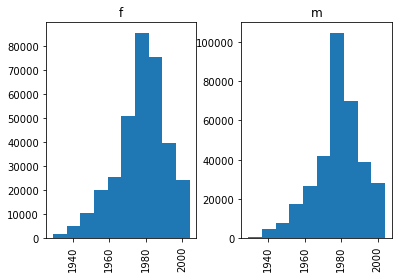

In [1063]:
base.hist(column = "birth", by = "sex")
  

La distribution via l'histogramme nous montre aussi qu'elle est identique.

In [132]:
base

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,2022-05
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968,2022-06
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980,2023-01
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951,2022-01
679328,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,f,1977,2022-03
679329,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,f,1988,2022-12
679330,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,m,1986,2021-07


## test binomial

In [1082]:
# Propotion homme femme 

vl=base['sex'].value_counts()
print(vl)

m    340930
f    338402
Name: sex, dtype: int64


In [1077]:
# somme des hommes et des femmes de la base

vl_max=vl.sum()
vl_max

679332

In [1075]:
nbre_homme=vl[0]
nbre_femme=vl[1]

In [1078]:
# test binomial


st.binom_test(nbre_homme,vl_max,1/2,alternative='two-sided')

0.002169817211732329

l'égalité des proportions est rejeté, la valeur étant très petite <0.05. Cpdt empiriquement la difference est insignifiante au vu du nombre de clients.

## Test de Pearson

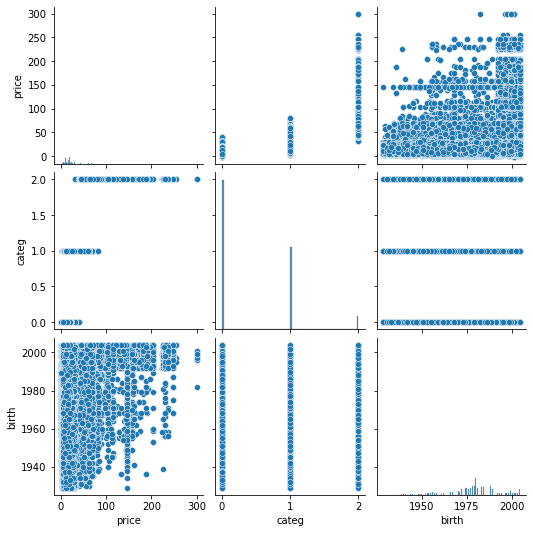

In [109]:
# généralité sur les variables \ Observation

sns.pairplot(base.iloc[:,0:8])


In [1382]:
# transformation en vu de l'utilisation de la fonction corr

base['sex'].replace(['m', 'f'],[0,1], inplace=True) 
base

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,1,1986,2022-05
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,0,1988,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,1,1968,2022-06
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,0,2000,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,0,1980,2023-01
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,1,1951,2022-01
679328,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,1,1977,2022-03
679329,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,1,1988,2022-12
679330,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,0,1986,2021-07


In [1383]:
# quantitative-quantitative \ test de pearson \ 'catégorie' et 'prix'

base.corr()


,price,categ,sex,birth
price,1.000000,0.671752,-0.007231,0.209465
categ,0.671752,1.000000,-0.000203,0.099241
sex,-0.007231,-0.000203,1.000000,-0.041038
birth,0.209465,0.099241,-0.041038,1.000000


In [1384]:
# test de Pearson suplémentaire qui indique une non corelation entre les variable sexe et categorie

base.sex.corr(base.categ)


-0.00020291697259974887

In [342]:

# test de pearsonr \ reprend les valeurs du tableau \ à rajouter 

st.pearsonr(base.categ,base.price)[0]


0.6717523998787631

On peut voir que la variable 'catégorie' et les prix (variable 'price') sont fortement corrélé. Le resultat s'accorde très bien avec les données obtenues précédemment. On a un résultat pour la covariance beaucoups plus grand que 0.







<AxesSubplot:title={'center':'birth'}, xlabel='categ'>

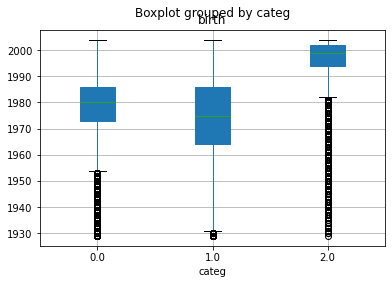

In [188]:
# âges en fonction des catégories

base.boxplot("birth","categ", patch_artist = True)




On peut clairement voir 3 catégorie étalée différemment. 

In [451]:
base

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,2022-05
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,m,1988,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,f,1968,2022-06
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,m,2000,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,m,1980,2023-01
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,f,1951,2022-01
679328,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,f,1977,2022-03
679329,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,f,1988,2022-12
679330,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,m,1986,2021-07


In [471]:
base_categ_0=base['categ']==0
base_categ_0=base[base_categ_0]
base_categ_0=base_categ_0['birth']
base_categ_0=base_categ_0.dropna()
base_categ_0=base_categ_0.value_counts()



In [472]:
base_categ_1=base['categ']==1
base_categ_1=base[base_categ_1]
base_categ_1=base_categ_1['birth']
base_categ_1=base_categ_1.dropna()
base_categ_1=base_categ_1.value_counts() 
base_categ_1=base_categ_1.tolist()

In [474]:

base_categ_2=base['categ']==2
base_categ_2=base[base_categ_2]
base_categ_2=base_categ_2['birth']
base_categ_2=base_categ_2.dropna()
base_categ_2=base_categ_2.value_counts() 
base_categ_2=base_categ_2.tolist()

In [475]:
st.kruskal(base_categ_0,base_categ_1,base_categ_2)

KruskalResult(statistic=100.72295565250934, pvalue=1.3436559498221517e-22)

##  CA en focntion de lâge

In [1389]:
base_birth=base[['price','birth']]
base_birth=base_birth.groupby(['birth']).sum()
base_birth=base_birth.reset_index()
base_birth

,birth,price
0,1929,3221.85
1,1930,4013.87
2,1931,2815.45
3,1932,5043.19
4,1933,5254.35
...,...,...
71,2000,165007.98
72,2001,178497.70
73,2002,184177.35
74,2003,178195.78


Text(0.5, 1.0, 'CA en fonction des âges')

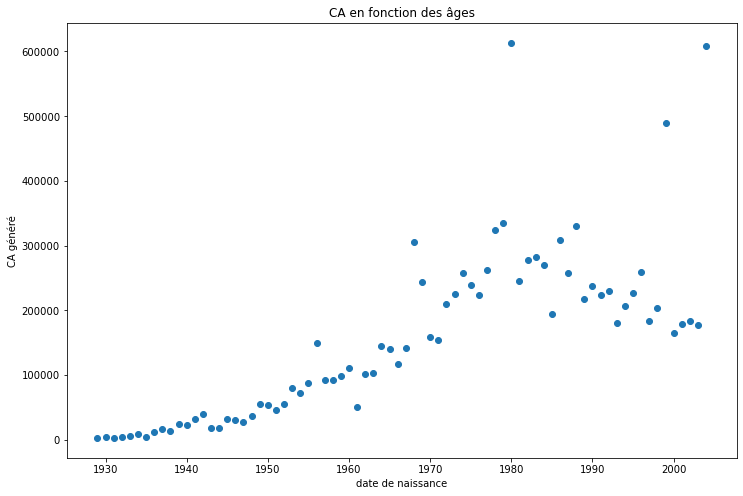

In [1388]:
plt.figure(figsize=(12,8))
plt.scatter( base_birth['birth'],base_birth['price'])
plt.ylabel('CA généré')
plt.xlabel('date de naissance')
plt.title('CA en fonction des âges')

Text(0.5, 1.0, 'CA en fonction des âges')

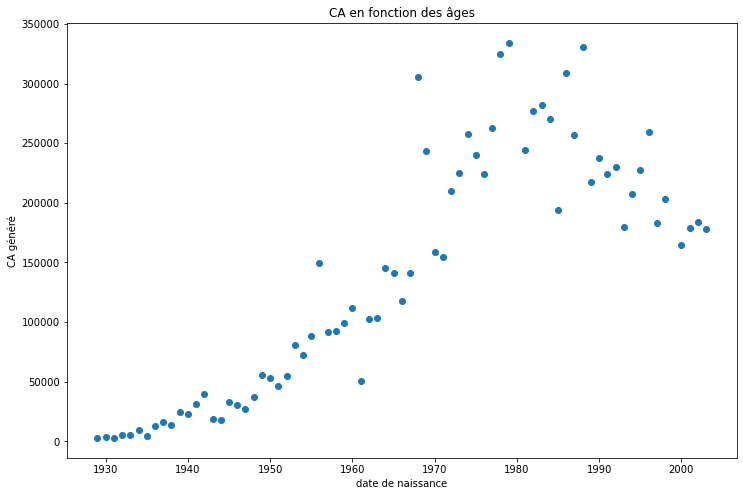

In [170]:
q=base_birth['price']<400000
base_birth_zoom=base_birth[q]

plt.figure(figsize=(12,8))
plt.scatter( base_birth_zoom['birth'],base_birth_zoom['price'])
plt.ylabel('CA généré')
plt.xlabel('date de naissance')
plt.title('CA en fonction des âges')

Les personnes les plus jeunes ont tendance à depenser plus que les personnes les plus vielles. entre 1990 et 2000, on peut voir clairerement que ce sont les plus représenté. 



In [1390]:
# Observation de la correlation entre l'âge et les achats 

base_birth.price.corr(base_birth.birth)

0.7788810457117034

In [1391]:
base_birth.price.cov(base_birth.birth)

2259656.417866435

In [337]:
# Nettoyage \ supression des valeurs négative

f=base['price']>0
base=base[f]

h=base['birth']>0
base=base[h]

In [1393]:

st.pearsonr(base_birth.price,base_birth.birth)[0]


0.7788810457117032

### Zoom sur les clusters

In [ ]:
# création des 3 clusters

base_b ( âge compris entre 93-52)

base_r ( âge compris entre 52-38)

base_j ( âge compris entre 38-18) 

In [88]:
# triage de la base en fonction des dates de naissance

base_date=base.sort_values(by='birth', ascending=True)

In [104]:
# filtre pour les personnes agée de 51 à 93 ans 

base_bb = (base_date['birth'] >= 1929) & (base_date['birth'] <=1971)
base_b=base_date[base_bb]
base_b

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
342248,1_320,2021-03-30,s_13681,c_577,27.46,1.0,0,1929,2021-03
260460,0_1449,2022-07-06,s_234654,c_577,4.99,0.0,0,1929,2022-07
381151,1_29,2022-01-15,s_150245,c_577,11.99,1.0,0,1929,2022-01
228136,1_677,2021-09-26,s_95746,c_5302,16.99,1.0,0,1929,2021-09
653456,0_1503,2022-12-02,s_306083,c_8362,15.99,0.0,1,1929,2022-12
...,...,...,...,...,...,...,...,...,...
405434,1_218,2021-09-12,s_88562,c_5205,10.72,1.0,1,1971,2021-09
43703,1_395,2022-01-08,s_146583,c_3517,28.99,1.0,1,1971,2022-01
366920,0_1621,2021-11-20,s_122227,c_8383,17.99,0.0,1,1971,2021-11
221455,0_1483,2022-06-16,s_224629,c_4127,4.99,0.0,1,1971,2022-06


In [105]:
# somme de CA de la tranche des 51 à 93 ans

base_b=base_b[['price','birth']]
base_b=base_b.groupby(['birth']).sum()
base_b=base_b.reset_index()
blue=round(base_b['price'].sum())
blue

3022159

In [106]:
# filtre pour les personnes agée de 51 à 35 ans 


base_rr = (base_date['birth'] >= 1971) & (base_date['birth'] <=1987)
base_r=base_date[base_rr]
base_r

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
623853,1_413,2023-01-02,s_320995,c_937,17.99,1.0,1,1971,2023-01
328083,0_978,2023-02-28,s_348285,c_3902,19.11,0.0,1,1971,2023-02
643634,1_246,2021-07-16,s_63250,c_2328,18.75,1.0,1,1971,2021-07
272781,1_464,2021-11-13,s_118996,c_4825,15.01,1.0,1,1971,2021-11
6240,1_437,2022-06-02,s_217902,c_4282,26.99,1.0,1,1971,2022-06
...,...,...,...,...,...,...,...,...,...
421602,0_1980,2022-07-06,s_234617,c_3025,3.15,0.0,0,1987,2022-07
448933,0_1769,2021-08-13,s_75077,c_6744,6.99,0.0,0,1987,2021-08
583911,0_1583,2022-09-08,s_265192,c_7172,15.99,0.0,1,1987,2022-09
222981,1_363,2022-01-07,s_146461,c_3010,16.99,1.0,1,1987,2022-01


In [107]:
# Somme du CA des personnes âgée de 51 à 35 ans

base_r=base_r[['price','birth']]
base_r=base_r.groupby(['birth']).sum()
base_r=base_r.reset_index()
red=round(base_r['price'].sum())
red

4681859

In [108]:
# filtre pour les personnes agée de 35 à 18 ans 


base_jj = (base_date['birth'] >= 1987) & (base_date['birth'] <=2004)
base_j=base_date[base_jj]
base_j

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois
68969,1_464,2022-03-28,s_185565,c_6381,15.01,1.0,0,1987,2022-03
569626,0_1779,2023-02-17,s_342890,c_7680,17.99,0.0,0,1987,2023-02
184048,0_1636,2022-10-31,s_290484,c_3010,9.45,0.0,1,1987,2022-10
68906,0_1999,2022-08-30,s_260908,c_8468,12.99,0.0,0,1987,2022-08
522720,0_1316,2021-12-20,s_136970,c_2230,7.20,0.0,0,1987,2021-12
...,...,...,...,...,...,...,...,...,...
386725,2_161,2023-01-20,s_329591,c_3948,113.99,2.0,1,2004,2023-01
572073,1_434,2022-03-25,s_184182,c_581,15.87,1.0,0,2004,2022-03
86215,1_407,2022-11-16,s_298462,c_8504,15.99,1.0,1,2004,2022-11
386971,0_1454,2022-02-28,s_172285,c_1764,7.41,0.0,1,2004,2022-02


In [109]:
# Somme du CA des personnes âgée de 18 à 35 ans

base_j=base_j[['price','birth']]
base_j=base_j.groupby(['birth']).sum()
base_j=base_j.reset_index()
jaune=round(base_j['price'].sum())
jaune

4561286

## Représentation graphique 

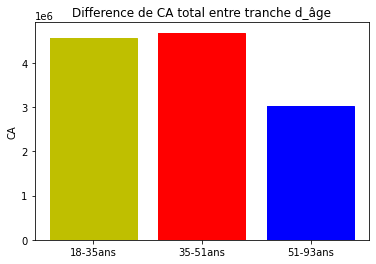

In [116]:
plt.figure()

values = [jaune,red,blue]

names = ['18-35ans','35-51ans','51-93ans']


plt.title('Difference de CA total entre tranche d_âge')
plt.ylabel('CA')

plt.bar(names, values)
X=plt.bar(names, values)
X[0].set_color('y')
X[1].set_color('r')
X[2].set_color('b')
          
plt.show()


## quantitative-qualitative

In [105]:

# quantitative-qualitative \ âges et le genre

base.groupby("sex").mean()


,price,categ,birth
sex,,,
f,17.320652,0.441805,1977.253426
m,17.585784,0.442048,1978.367372


In [ ]:
Très peu de distiction en fonction du sexe sont observable ce qui reprend les observations précédente.

array([<AxesSubplot:title={'center':'f'}>,
       <AxesSubplot:title={'center':'m'}>], dtype=object)

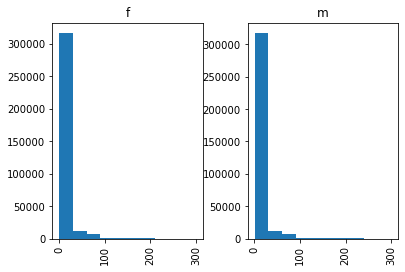

In [412]:
# diagramme de dispersion \ âge et sexe

base.hist(column = "price", by = "sex")


Aucune observation concluante concernant la distinction entre le sexe et les achats

array([<AxesSubplot:title={'center':'f'}>,
       <AxesSubplot:title={'center':'m'}>], dtype=object)

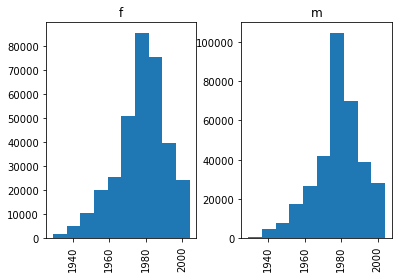

In [199]:
base.hist(column = "birth", by = "sex")


In [203]:
base.groupby("sex")["birth"].agg([np.mean, np.std, np.median, np.min, np.max])


,mean,std,median,amin,amax
sex,,,,,
f,1977.253426,13.890792,1979,1929,2004
m,1978.367372,13.231406,1980,1929,2004


<AxesSubplot:title={'center':'birth'}, xlabel='sex'>

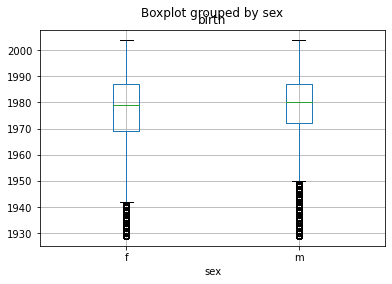

In [205]:
# Observation differente \ boxplot

base.boxplot(column = "birth", by = "sex") 


# Test de ki2

In [1497]:
base_t=base[['categ','sex']]
base_t


,categ,sex
0,0.0,1
1,1.0,0
2,0.0,1
3,2.0,0
4,0.0,0
...,...,...
679327,0.0,1
679328,1.0,1
679329,0.0,1
679330,0.0,0


In [1498]:
base_t['sex'].replace(['m', 'f'],[0,1], inplace=True)
base_t

C:\anaconda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,categ,sex
0,0.0,1
1,1.0,0
2,0.0,1
3,2.0,0
4,0.0,0
...,...,...
679327,0.0,1
679328,1.0,1
679329,0.0,1
679330,0.0,0


In [1499]:
# réalisation du tableau entre catégorie et sexe \ tableau de contingence \ avec les totaux \ margins=True,margins_name='Total'

table_cross2=base_t.pivot_table(index='sex',columns='categ',margins=True,margins_name='Total',aggfunc = len,observed=False,)
table_cross2

categ,0.0,1.0,2.0,Total
sex,,,,
0,209356,112270,19200,340826
1,206103,114899,17283,338285
Total,415459,227169,36483,679111


In [1489]:
table_cross2_test=table_cross2/1000000

In [1453]:
# autre façon de faire \ réalisation du tableau entre catégorie et sexe \ tableau de contingence \ --> margins=True(ss totaux)

table_cross=pd.crosstab(base_t['sex'],base_t['categ'], margins=True)
table_cross


categ,0.0,1.0,2.0,All
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
All,415459,227169,36483,679111


In [1460]:
# reprends les lignes des totaux 

tx = table_cross2.loc[:,['Total']]
ty = table_cross2.loc[['Total'],:]

In [1433]:
n = len(base)


In [1463]:



indep = round(tx.dot(ty) / n)
indep


categ,0.0,1.0,2.0,Total
sex,,,,
f,206952.0,113160.0,18173.0,338285.0
m,208507.0,114009.0,18310.0,340826.0
Total,415459.0,227169.0,36483.0,679111.0


In [1362]:
c = table_cross2.fillna(0) # On remplace les valeurs nulles par 0
c

categ,0.0,1.0,2.0,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


In [1363]:
measure = (c-indep)**2/indep
measure


categ,0.0,1.0,2.0,Total
sex,,,,
f,3.482938,26.724293,43.586640,0.0
m,3.456963,26.525283,43.260513,0.0
Total,0.000000,0.000000,0.000000,0.0


In [1364]:
xi_n = measure.sum().sum()
xi_n

147.03663017710468

In [1469]:
table = measure/xi_n
table

categ,0.0,1.0,2.0,Total
sex,,,,
f,0.023688,0.181753,0.296434,0.0
m,0.023511,0.180399,0.294216,0.0
Total,0.000000,0.000000,0.000000,0.0


In [1470]:
table.iloc[:-1,:-1]

categ,0.0,1.0,2.0
sex,,,
f,0.023688,0.181753,0.296434
m,0.023511,0.180399,0.294216


In [1471]:
c.iloc[:-1,:-1]


categ,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


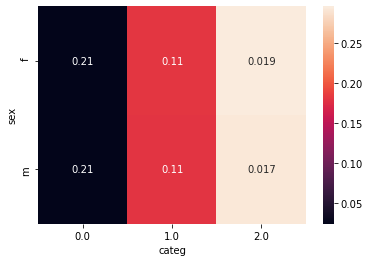

In [1490]:

sns.heatmap(table.iloc[:-1,:-1],annot=table_cross2_test.iloc[:-1,:-1])
plt.show()

In [1378]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(table_cross2)
print('la p-value est de:',st_p)

la p-value est de: 3.144522803251581e-29


In [1377]:
st_chi2

147.11906816131497

Dans notre cas, la pvaleur obtenue par notre échantillon est de 3.144522803251581e-29
ce qui est en dessous du seuil fixé. On peut donc rejeter l’hypothèse nulle. Les variables sex et categorie ne sont pas indépendante

## Genre et catégorie

In [54]:
base_categ=base[['sex','categ']]

f=base_categ['sex']==1
base_categ_f=base_categ[f]


h=base_categ['sex']==0
base_categ_h=base_categ[h]




In [78]:
base_categ_ff=base_categ_f['categ'].value_counts()
base_categ_ff

0.0    206103
1.0    114899
2.0     17283
Name: categ, dtype: int64

In [86]:
base_categ_hh=base_categ_h['categ'].value_counts()
base_categ_hh

0.0    209356
1.0    112270
2.0     19200
Name: categ, dtype: int64

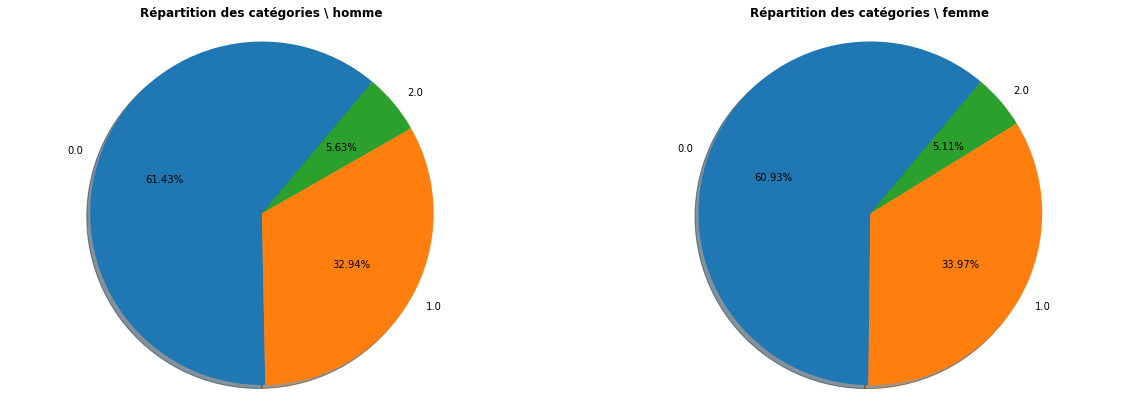

In [84]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)

label = "Répartition des catégories \ homme"
labels = 0.0,1.0,2.0
sizes = [base_categ_hh[el] for el in labels]
explode = (0, 0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=50)
plt.axis('equal')
plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")

plt.subplot(1,2,2)

label = "Répartition des catégories \ femme"
labels = 0.0,1.0,2.0
sizes = [base_categ_ff[el] for el in labels ]
explode = (0, 0,0) 

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=50)
plt.axis('equal') 
plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
plt.show()

In [384]:
base_panier_moy_moy

,birth,panier_moyen
0,1929,16.029104
1,1930,17.760487
2,1931,16.561471
3,1932,16.216045
4,1933,16.068349
...,...,...
71,2000,37.374401
72,2001,41.979704
73,2002,40.152027
74,2003,40.767737


In [381]:
# correlation entre le panier moyen et l'âge

base_panier_moy_moy.corr()



,birth,panier_moyen
birth,1.000000,0.547934
panier_moyen,0.547934,1.000000


In [385]:
base_panier_session

,birth,price,session_id,panier_moyen
0,1929,3221.85,201,47.952503
1,1930,4013.87,226,59.125841
2,1931,2815.45,170,69.403922
3,1932,5043.19,311,99.721798
4,1933,5254.35,327,128.212972
...,...,...,...,...
71,2000,165007.98,4415,5288.579268
72,2001,178497.70,4252,5610.523417
73,2002,184177.35,4587,5915.987466
74,2003,178195.78,4371,6438.154570


In [383]:
# correlation entre la fréquence d'âchat et l'âge

base_panier_session.corr()

,birth,price,session_id,panier_moyen
birth,1.000000,0.822448,0.581224,0.751835
price,0.822448,1.000000,0.793206,0.722043
session_id,0.581224,0.793206,1.000000,0.210214
panier_moyen,0.751835,0.722043,0.210214,1.000000


# Probabilité 

Calcul de la probabilité de B sachant A

pour calculer p(b) sachant la probabilité de p(a), On compte les personnes qui on l'ouvrage de b sachant qu'il ont l'ouvrage A

In [ ]:
b='0_525' # 2dn achat
a='2_159' # 1er achat
Omega = 3287 ouvrages # Nombre d'ouvrage


In [460]:

r1=base["id_prod"]=='0_525'


r2=base["id_prod"]=='2_159'




In [400]:
# affectation 

pb=500
pa=650

# fonction pour Omega

def proba(achat):
    achat= round(achat/3287,2)
    return achat

# Probabilité de base pour p(a) et p(b)

print('La probabilité de pb est de :', proba(pb))
print('La probabilité de pa est de :', proba(pa))

La probabilité de pb est de : 0.15
La probabilité de pa est de : 0.2


On peut dire que l'on recherche parmis les 650 personnes sur 3287 qui ont l'ouvrage A ceux qui ont acheté l'ouvrage B

In [374]:
# base avec les deux ouvrages

base_proba=base.query('id_prod == ["0_525","2_159"]')
base_proba

,id_prod,date,session_id,client_id,price,categ,sex,birth
258,2_159,2023-02-03 00:00:21.794867,s_336117,c_6135,145.99,2.0,m,1975
1050,0_525,2021-04-01 15:38:20.291404,s_14513,c_1403,2.99,0.0,f,1978
1184,2_159,2022-01-24 06:27:18.630809,s_154400,c_4222,145.99,2.0,m,1981
1297,0_525,2021-09-24 06:35:23.770587,s_94634,c_7285,2.99,0.0,f,1989
2248,2_159,2022-04-16 06:18:45.954099,s_194760,c_2469,145.99,2.0,m,1999
...,...,...,...,...,...,...,...,...
676457,0_525,2022-10-25 06:42:35.582068,s_287683,c_3031,2.99,0.0,f,1974
677103,2_159,2022-10-29 22:08:12.792359,s_289878,c_1991,145.99,2.0,m,1990
677233,2_159,2022-12-27 17:16:55.166842,s_318181,c_2982,145.99,2.0,f,1990
678768,2_159,2021-12-20 09:03:18.254346,s_137154,c_4554,145.99,2.0,f,1959


In [429]:
base_proba.groupby(['client_id']).count()

,id_prod,date,session_id,price,categ,sex,birth
client_id,,,,,,,
c_1025,4,4,4,4,4,4,4
c_1028,2,2,2,2,2,2,2
c_1050,2,2,2,2,2,2,2
c_1063,2,2,2,2,2,2,2
c_1077,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
c_8597,3,3,3,3,3,3,3
c_894,2,2,2,2,2,2,2
c_92,2,2,2,2,2,2,2


Avec cette base on récupére les deux ouvrages en question.

In [99]:
# clients ayant les deux livres \ création des colonnes

x1=base_proba['id_prod']=='2_159'
x1=base_proba[x1]
x2=base_proba['id_prod']=='0_525'
x2=base_proba[x2]


base_proba['pa']=x1['id_prod']
base_proba['pb']=x2['id_prod']


<ipython-input-99-16aeb7d98461>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_proba['pa']=x1['id_prod']
<ipython-input-99-16aeb7d98461>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_proba['pb']=x2['id_prod']


In [174]:
base_proba

,id_prod,date,session_id,client_id,price,categ,sex,birth,pa,pb
580598,2_159,2022-08-23 21:46:12.819794,s_257493,c_1025,145.99,2.0,m,1984,2_159,NaN
341448,0_525,2022-07-29 04:29:32.995701,s_245285,c_1025,2.99,0.0,m,1984,NaN,0_525
257210,0_525,2022-08-23 21:46:13.819794,s_257493,c_1025,2.99,0.0,m,1984,NaN,0_525
187491,2_159,2022-07-29 04:29:31.995701,s_245285,c_1025,145.99,2.0,m,1984,2_159,NaN
515958,2_159,2022-03-14 21:09:39.089607,s_179184,c_1028,145.99,2.0,m,1986,2_159,NaN
...,...,...,...,...,...,...,...,...,...,...
8212,2_159,2021-09-02 16:37:09.189008,s_84098,c_894,145.99,2.0,m,1988,2_159,NaN
240582,2_159,2021-05-10 14:47:32.104667,s_32603,c_92,145.99,2.0,f,1998,2_159,NaN
553978,0_525,2021-05-10 14:47:33.104667,s_32603,c_92,2.99,0.0,f,1998,NaN,0_525
138107,2_159,2022-02-26 10:23:00.071751,s_171131,c_946,145.99,2.0,m,2001,2_159,NaN


In [177]:
# triage

base_proba=base_proba.sort_values(by='client_id', ascending=True)
base_proba

,id_prod,date,session_id,client_id,price,categ,sex,birth,pa,pb
580598,2_159,2022-08-23 21:46:12.819794,s_257493,c_1025,145.99,2.0,m,1984,2_159,NaN
341448,0_525,2022-07-29 04:29:32.995701,s_245285,c_1025,2.99,0.0,m,1984,NaN,0_525
257210,0_525,2022-08-23 21:46:13.819794,s_257493,c_1025,2.99,0.0,m,1984,NaN,0_525
187491,2_159,2022-07-29 04:29:31.995701,s_245285,c_1025,145.99,2.0,m,1984,2_159,NaN
515958,2_159,2022-03-14 21:09:39.089607,s_179184,c_1028,145.99,2.0,m,1986,2_159,NaN
...,...,...,...,...,...,...,...,...,...,...
8212,2_159,2021-09-02 16:37:09.189008,s_84098,c_894,145.99,2.0,m,1988,2_159,NaN
240582,2_159,2021-05-10 14:47:32.104667,s_32603,c_92,145.99,2.0,f,1998,2_159,NaN
553978,0_525,2021-05-10 14:47:33.104667,s_32603,c_92,2.99,0.0,f,1998,NaN,0_525
138107,2_159,2022-02-26 10:23:00.071751,s_171131,c_946,145.99,2.0,m,2001,2_159,NaN


In [187]:
# agrégation

base_h=base_proba.groupby(['client_id']).count()
base_h

,id_prod,date,session_id,price,categ,sex,birth,pa,pb
client_id,,,,,,,,,
c_1025,4,4,4,4,4,4,4,2,2
c_1028,2,2,2,2,2,2,2,1,1
c_1050,2,2,2,2,2,2,2,1,1
c_1063,2,2,2,2,2,2,2,1,1
c_1077,2,2,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...
c_8597,3,3,3,3,3,3,3,3,0
c_894,2,2,2,2,2,2,2,1,1
c_92,2,2,2,2,2,2,2,1,1


In [380]:
# filtre pour récupéré les personnes concerné

m=(base_h['pa']>=1) & (base_h['pb']>=1)
base_h=base_h[m]
base_h


,client_id,id_prod,pa,pb
0,c_1025,4,2,2
1,c_1028,2,1,1
2,c_1050,2,1,1
3,c_1063,2,1,1
4,c_1077,2,1,1
...,...,...,...,...
454,c_8541,2,1,1
455,c_8562,2,1,1
456,c_8572,2,1,1
457,c_894,2,1,1


Nous avons maintenant les 449 clients qui ont en leurs possessions les deux ouvrages. On cherche à présent à verifier l'ordre d'achat. 

In [363]:
# supression des doublons

base_h.drop_duplicates(subset=['client_id'], keep='first')

,client_id,id_prod,pa,pb
0,c_1025,4,2,2
1,c_1028,2,1,1
2,c_1050,2,1,1
3,c_1063,2,1,1
4,c_1077,2,1,1
...,...,...,...,...
454,c_8541,2,1,1
455,c_8562,2,1,1
456,c_8572,2,1,1
457,c_894,2,1,1


In [296]:
# jointure par la gauche sur la base_h \ Récupération des personnes qui ont les deux ouvrages \ Récupération des dates

basee=base_h.merge(base_proba, how='left', on='client_id')
basee

,client_id,id_prod_x,pa_x,pb_x,id_prod_y,date,session_id,price,categ,sex,birth,pa_y,pb_y
0,c_1025,4,2,2,2_159,2022-08-23 21:46:12.819794,s_257493,145.99,2.0,m,1984,2_159,NaN
1,c_1025,4,2,2,0_525,2022-07-29 04:29:32.995701,s_245285,2.99,0.0,m,1984,NaN,0_525
2,c_1025,4,2,2,0_525,2022-08-23 21:46:13.819794,s_257493,2.99,0.0,m,1984,NaN,0_525
3,c_1025,4,2,2,2_159,2022-07-29 04:29:31.995701,s_245285,145.99,2.0,m,1984,2_159,NaN
4,c_1028,2,1,1,2_159,2022-03-14 21:09:39.089607,s_179184,145.99,2.0,m,1986,2_159,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,c_8572,2,1,1,0_525,2022-09-29 10:58:15.976082,s_275188,2.99,0.0,f,1966,NaN,0_525
1006,c_894,2,1,1,0_525,2021-09-02 16:37:10.189008,s_84098,2.99,0.0,m,1988,NaN,0_525
1007,c_894,2,1,1,2_159,2021-09-02 16:37:09.189008,s_84098,145.99,2.0,m,1988,2_159,NaN
1008,c_92,2,1,1,2_159,2021-05-10 14:47:32.104667,s_32603,145.99,2.0,f,1998,2_159,NaN


In [301]:
# Netoyage
del basee['pa_x']
del basee['pb_x']

In [310]:
# triage avec la date et l'id du client.

basee.sort_values(by='date', ascending=True, inplace=True)
basee.sort_values(by='client_id', ascending=False)

,client_id,id_prod_y,date,session_id,price,categ,sex,birth,pa_y,pb_y
1008,c_92,2_159,2021-05-10 14:47:32.104667,s_32603,145.99,2.0,f,1998,2_159,NaN
1009,c_92,0_525,2021-05-10 14:47:33.104667,s_32603,2.99,0.0,f,1998,NaN,0_525
1007,c_894,2_159,2021-09-02 16:37:09.189008,s_84098,145.99,2.0,m,1988,2_159,NaN
1006,c_894,0_525,2021-09-02 16:37:10.189008,s_84098,2.99,0.0,m,1988,NaN,0_525
1005,c_8572,0_525,2022-09-29 10:58:15.976082,s_275188,2.99,0.0,f,1966,NaN,0_525
...,...,...,...,...,...,...,...,...,...,...
4,c_1028,2_159,2022-03-14 21:09:39.089607,s_179184,145.99,2.0,m,1986,2_159,NaN
0,c_1025,2_159,2022-08-23 21:46:12.819794,s_257493,145.99,2.0,m,1984,2_159,NaN
1,c_1025,0_525,2022-07-29 04:29:32.995701,s_245285,2.99,0.0,m,1984,NaN,0_525
3,c_1025,2_159,2022-07-29 04:29:31.995701,s_245285,145.99,2.0,m,1984,2_159,NaN


In [326]:
# netoyage date 

basee['date']=basee['date'].astype("string")

basee['date']=basee['date'].str[0:10]

b=basee['date']

basee['date']=pd.to_datetime(b, errors='coerce') 

basee['date']

136   2021-03-01
137   2021-03-01
601   2021-03-02
600   2021-03-02
358   2021-03-03
         ...    
574   2023-02-21
879   2023-02-22
878   2023-02-22
639   2023-02-27
638   2023-02-27
Name: date, Length: 1010, dtype: datetime64[ns]

In [387]:
# base final

basee

,client_id,id_prod_y,date,session_id,price,categ,sex,birth,pa_y,pb_y
136,c_2011,2_159,2021-03-01,s_397,145.99,2.0,m,1965,2_159,NaN
137,c_2011,0_525,2021-03-01,s_397,2.99,0.0,m,1965,NaN,0_525
601,c_5585,2_159,2021-03-02,s_757,145.99,2.0,m,1954,2_159,NaN
600,c_5585,0_525,2021-03-02,s_757,2.99,0.0,m,1954,NaN,0_525
358,c_3612,2_159,2021-03-03,s_1078,145.99,2.0,m,1988,2_159,NaN
...,...,...,...,...,...,...,...,...,...,...
574,c_5362,0_525,2023-02-21,s_344793,2.99,0.0,f,1980,NaN,0_525
879,c_7507,2_159,2023-02-22,s_345435,145.99,2.0,m,1981,2_159,NaN
878,c_7507,0_525,2023-02-22,s_345435,2.99,0.0,m,1981,NaN,0_525
639,c_5758,2_159,2023-02-27,s_347917,145.99,2.0,m,1978,2_159,NaN


In [391]:
# Vérification de l'ordre des achats

basee.drop_duplicates(subset=['client_id'], keep='last') # dernier livre acheté
basee.drop_duplicates(subset=['client_id'], keep='last') # premier livre acheté

,client_id,id_prod_y,date,session_id,price,categ,sex,birth,pa_y,pb_y
137,c_2011,0_525,2021-03-01,s_397,2.99,0.0,m,1965,NaN,0_525
600,c_5585,0_525,2021-03-02,s_757,2.99,0.0,m,1954,NaN,0_525
101,c_1714,0_525,2021-03-04,s_1610,2.99,0.0,m,1990,NaN,0_525
297,c_3191,0_525,2021-03-05,s_2313,2.99,0.0,f,1984,NaN,0_525
837,c_7206,0_525,2021-03-07,s_2904,2.99,0.0,m,1979,NaN,0_525
...,...,...,...,...,...,...,...,...,...,...
95,c_1698,0_525,2023-02-19,s_343979,2.99,0.0,f,1956,NaN,0_525
348,c_3558,0_525,2023-02-20,s_344167,2.99,0.0,m,2003,NaN,0_525
574,c_5362,0_525,2023-02-21,s_344793,2.99,0.0,f,1980,NaN,0_525
878,c_7507,0_525,2023-02-22,s_345435,2.99,0.0,m,1981,NaN,0_525


On peut voir que l'ordre n'importe pas

Parmis les clients qui achete les deux ouvrages, il y 459 personnes qui sont concerné par l'achat de p(a) et de p(b). Donc p(a) inter p(b) = 459/3287 


In [475]:
Pa_int_pb=round(459/3287,2)
Pa_int_pb

0.14

In [254]:
# Rappel \ Calcul de Probabilité de b sachant a 

P(b|a)=P(b∩a)/P(a)


SyntaxError: invalid character in identifier (<ipython-input-254-8f3526295036>, line 3)

In [482]:
pb_sachant_pa=round(0.14/0.20,2)
print(pb_sachant_pa)

0.7
